## COMP5328 Assignment 2
### Authors - Pooja Vijay Mahajan(510282930) & Tulika Shrivastava (500657898)


### 1. Load Data

#### 1.1 Import Namespaces

In [1]:
import os
import copy
import random
import numpy as np
from numpy import vstack
import seaborn as sns
from collections import OrderedDict
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.models as models
import torch.optim as optim
from torch.optim import lr_scheduler
from timeit import default_timer as timer
import sys
import traceback
import torchvision.transforms
from sklearn.preprocessing import OneHotEncoder
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Module
from torch.optim import SGD
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from torchvision import transforms, utils
from sklearn.metrics import accuracy_score

#### 1.2 Define file paths

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674

Mounted at /content/drive


In [3]:
!ls -l /content/drive/MyDrive/COMP5328-AdvancedML/Assignment2/code/data

total 86342
-rw------- 1 root root 55440974 Oct 22 09:52 CIFAR.npz
-rw------- 1 root root 16485974 Oct 22 09:52 FashionMNIST0.3.npz
-rw------- 1 root root 16485974 Oct 22 09:52 FashionMNIST0.6.npz


In [4]:
#File path for the datasets.
#FASHION_MNIST_3_FILE_PATH = "../data/FashionMNIST0.3.npz"
#FASHION_MNIST_6_FILE_PATH = "../data/FashionMNIST0.6.npz"
#CIFAR_FILE_PATH = "../data/Cifar.npz"

FASHION_MNIST_3_FILE_PATH = "/content/drive/MyDrive/COMP5328-AdvancedML/Assignment2/code/data/FashionMNIST0.3.npz"
FASHION_MNIST_6_FILE_PATH = "/content/drive/MyDrive/COMP5328-AdvancedML/Assignment2/code/data/FashionMNIST0.6.npz"
CIFAR_FILE_PATH = "/content/drive/MyDrive/COMP5328-AdvancedML/Assignment2/code/data/CIFAR.npz"

#### 1.3 Define Image size

In [5]:
IMAGE_SIZE_MNIST_3 = (28, 28)
IMAGE_SIZE_MNIST_6 = (28, 28)
IMAGE_SIZE_CIFAR = (3, 32, 32)
IMAGE_SIZE_CIFAR_GRAY = (32, 32)

#### 1.4 Load data from the file

In [87]:
# For GPU usage
if torch.cuda.is_available():
  use_cuda = True
else:
  use_cuda = False

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu

In [7]:
def load_dataset(file_path):
    """
    This method loads the data from the file name passed to it.
    
    param type: string
    param file_path: File path of laod the data from
    
    type output: tuple
    output: tuple containing the training and test data and label.
    """
    try:
        dataset = np.load(file_path)
        X_data = dataset["Xtr"]
        y_data = dataset["Str"]

        X_test = dataset["Xts"]
        y_test = dataset["Yts"]

        return X_data, y_data, X_test, y_test
    except: 
        traceback.print_exception(*sys.exc_info())
        
#https://www.geeksforgeeks.org/how-to-print-exception-stack-trace-in-python/
#https://stackoverflow.com/questions/43829711/what-is-the-correct-way-to-change-image-channel-ordering-between-channels-first

In [8]:
#Load FASHION MNIST 3 Dataset
X_data_mnist3, y_data_mnist3, X_test_mnist3, y_test_mnist3 = load_dataset(FASHION_MNIST_3_FILE_PATH)
#Reshape array
X_data_mnist3 = X_data_mnist3.reshape(-1, 28, 28, 1)
X_data_mnist3 = np.rollaxis(X_data_mnist3, 3, 1)  

X_test_mnist3 = X_test_mnist3.reshape(-1, 28, 28, 1)
X_test_mnist3 = np.rollaxis(X_test_mnist3, 3, 1)

print ("Shape of X_data_mnist3", X_data_mnist3.shape)
print ("Shape of y_data_mnist3", y_data_mnist3.shape)
print ("Shape of X_test_mnist3", X_test_mnist3.shape)
print ("Shape of y_test_mnist3", y_test_mnist3.shape)

Shape of X_data_mnist3 (18000, 1, 28, 28)
Shape of y_data_mnist3 (18000,)
Shape of X_test_mnist3 (3000, 1, 28, 28)
Shape of y_test_mnist3 (3000,)


In [9]:
#Load FASHION MNIST 6 Dataset
X_data_mnist6, y_data_mnist6, X_test_mnist6, y_test_mnist6 = load_dataset(FASHION_MNIST_6_FILE_PATH)
#Reshape array
X_data_mnist6 = X_data_mnist6.reshape(-1, 28, 28, 1)
X_data_mnist6 = np.rollaxis(X_data_mnist6, 3, 1)  

X_test_mnist6 = X_test_mnist6.reshape(-1, 28, 28, 1)
X_test_mnist6 = np.rollaxis(X_test_mnist6, 3, 1)

print ("Shape of X_data_mnist6", X_data_mnist6.shape)
print ("Shape of y_data_mnist6", y_data_mnist6.shape)
print ("Shape of X_test_mnist6", X_test_mnist6.shape)
print ("Shape of y_test_mnist6", y_test_mnist6.shape)

Shape of X_data_mnist6 (18000, 1, 28, 28)
Shape of y_data_mnist6 (18000,)
Shape of X_test_mnist6 (3000, 1, 28, 28)
Shape of y_test_mnist6 (3000,)


In [10]:
#Load CIFAR Dataset
X_data_cifar, y_data_cifar, X_test_cifar, y_test_cifar = load_dataset(CIFAR_FILE_PATH)

#Reshape array
X_data_cifar = np.rollaxis(X_data_cifar, 3, 1)  

X_test_cifar = np.rollaxis(X_test_cifar, 3, 1)

print ("Shape of X_data_cifar", X_data_cifar.shape)
print ("Shape of y_data_cifar", y_data_cifar.shape)
print ("Shape of X_test_cifar", X_test_cifar.shape)
print ("Shape of y_test_cifar", y_test_cifar.shape)

Shape of X_data_cifar (15000, 3, 32, 32)
Shape of y_data_cifar (15000,)
Shape of X_test_cifar (3000, 3, 32, 32)
Shape of y_test_cifar (3000,)


### 2. Initial Data Analysis

#### 2.1 Common Helper Methods

In [11]:
def get_label_count(dataset):
    """
    This method return the unique labels and its count for the dataset passed to it.
    
    param type: array
    param dataset: Dataset containing the labels

    type output: tuple
    output: tuple containing the unique labels and its count (labels, count).
    """
    try:
        (labels, count) = np.unique(dataset, return_counts = True)
        return (labels, count)
        
    except: 
        traceback.print_exception(*sys.exc_info())

#https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [12]:
def plot_bar_graph(labels, count, x_label, y_label, title, width = 0.65):
    """
    This method plots the bar graph based on the data passed to it. 
    
    param type: array
    param label: Data to plot on X axis
    
    param type: array
    param count: Data to plot on Y axis
    
    param type: string
    param x_label: label for x axis

    param type: string
    param y_label: label for y axis

    param type: decimal
    param y_label: width of the bar

    param type: string
    param title: label for title
    """
    try:
        sns.set(rc={'figure.figsize':(6, 6)})
        sns.set_theme(style = "whitegrid")
        ax = sns.barplot(x = labels, y = count)
        ax.set(title = title)
        ax.set(xlabel = x_label)
        ax.set(ylabel = y_label)
        ax.grid(False)
        
        for l, c in zip(labels, count):
            ax.text(l, c, c, color='black', ha="center")
    except: 
        traceback.print_exception(*sys.exc_info())

#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://wellsr.com/python/seaborn-barplot-tutorial-for-python/
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary

In [13]:
def print_ida_summary(dataset_name, dataset_type, X, y):
    """
    This method prints the initial data analysis summary of the dataset passed to it.
    
    param type: string
    param dataset_name: Name of the image dataset. 
    Possible values are "FASHION MNIST 3", "FASHION MNIST 6" and "CIFAR"
    
    param type: string
    param dataset_type: Type of the image dataset. 
    Possible values are "training" or "test"
    
    param type: array
    param X: Dataset containing image pixels
    
    param type: array
    param y: Dataset containing image labels   
    """
    try:
        print("{0} {1} dataset".format(dataset_name, dataset_type))

        y_label, y_label_count = get_label_count(y)

        print("Number of labels:", len(y_label))
        print("Number of images:", X.shape[0])
        print("Shape of dataset:", X.shape)
        print("Shape of labels:", y.shape)
        print("Minimum pixel value: {0}, Maximum pixel value:{1}".format(X.min(), X.max()))

        #Plot bar graph for the labels and its count
        plot_bar_graph(y_label, y_label_count,  
                       "Label's name", "Count", 
                       "Label's count for {0} {1} dataset".format(dataset_name, dataset_type))
    except: 
        traceback.print_exception(*sys.exc_info())

In [14]:
def display_image(plt, data, image_size, title, xlabel):
    """
    This method plots the image based on the data and title passed to it. 
    
    param type: pyplot
    param plt: pyplot object
    
    param type: array
    param data: Data to plot the image from
    
    param type: tuple
    param image_size: default size of the image

    param type: string
    param title: label for title
    
    param type: string
    param xlabel: label for the image
    """
    try:
        if image_size is not None:
            plt.imshow(data.reshape(image_size[0], image_size[1]), cmap = plt.cm.gray) 
        else:
            plt.imshow(np.rollaxis(data, 0, 3), interpolation = "nearest") 
        
        plt.xticks([])
        plt.yticks([])
        plt.title(title)
        plt.xlabel(xlabel)
        
    except: 
        traceback.print_exception(*sys.exc_info())
        
#https://stackoverflow.com/questions/41856787/plot-colour-image-from-a-numpy-array-that-has-3-channels

In [15]:
def display_images(dataset, image_index, image_size, title, labels):
    """
    This method plots the image based on the data and index passed to it. 
    
    param type: array
    param dataset: Data to plot the image from
    
    param type: array
    param image_index: Random index of images to be plotted 
    
    param type: tuple
    param image_size: default size of the image

    param type: string
    param title: label for title
    
    param type: array
    param title: labels for image dataset
    """
    try:
        plt.figure(figsize=(20, 2))
        fig = plt.gcf()
        fig.suptitle(title, y = 1.25)  
        num_of_images = len(image_index) 
        for index in range(num_of_images):
            plt.subplot(1, num_of_images, index + 1)
            display_image(plt, dataset[image_index[index], :], 
                          image_size, "img:" + str(image_index[index]), 
                          labels[image_index[index]])
        plt.show()
        
    except: 
        traceback.print_exception(*sys.exc_info())
        
#https://stackoverflow.com/questions/7526625/matplotlib-global-legend-and-title-aside-subplots

#### 2.2 Explore datasets

##### 2.2.1 FASHION MNIST 3 training dataset

FASHION MNIST 3 training dataset
Number of labels: 3
Number of images: 18000
Shape of dataset: (18000, 1, 28, 28)
Shape of labels: (18000,)
Minimum pixel value: 0, Maximum pixel value:255


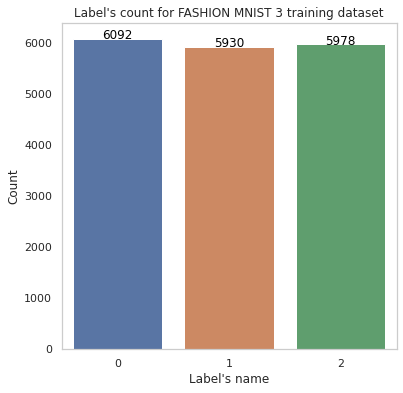

In [16]:
#FASHION MNIST 3 training dataset
print_ida_summary("FASHION MNIST 3", "training", X_data_mnist3, y_data_mnist3)

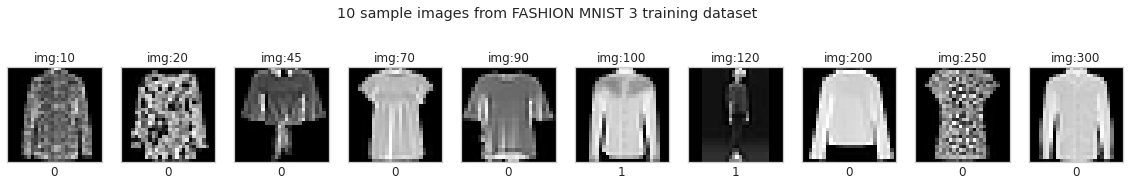

In [17]:
#Display sample images from FASHION MNIST 3 training  dataset
image_index = [10, 20, 45, 70, 90, 100, 120, 200, 250, 300]
display_images(X_data_mnist3, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 training dataset",
              y_data_mnist3)

##### 2.2.2 FASHION MNIST 3 test dataset

FASHION MNIST 3 test dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 1, 28, 28)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


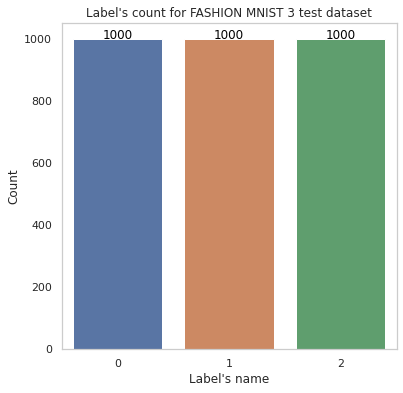

In [18]:
#FASHION MNIST 3 test dataset
print_ida_summary("FASHION MNIST 3", "test", X_test_mnist3, y_test_mnist3)

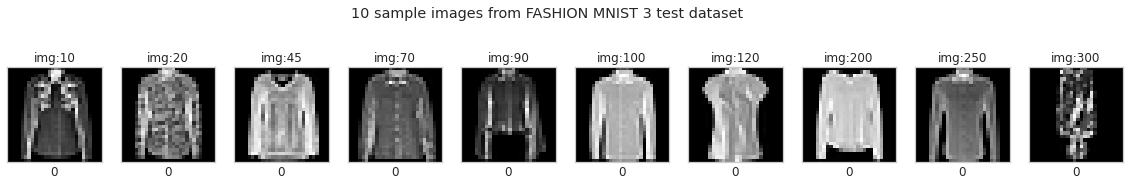

In [19]:
#Display sample images from FASHION MNIST 3 test dataset
image_index = [10, 20, 45, 70, 90, 100, 120, 200, 250, 300]
display_images(X_test_mnist3, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 test dataset",
              y_test_mnist3)

##### 2.2.3 FASHION MNIST 6 training dataset

FASHION MNIST 6 training dataset
Number of labels: 3
Number of images: 18000
Shape of dataset: (18000, 1, 28, 28)
Shape of labels: (18000,)
Minimum pixel value: 0, Maximum pixel value:255


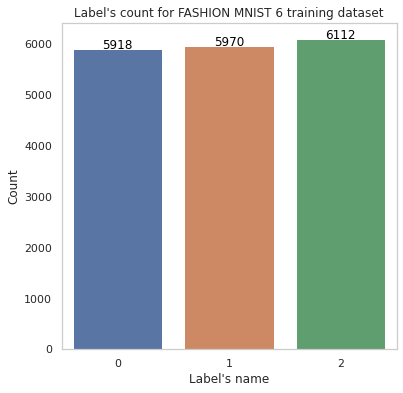

In [20]:
#FASHION MNIST 6 training dataset
print_ida_summary("FASHION MNIST 6", "training", X_data_mnist6, y_data_mnist6)

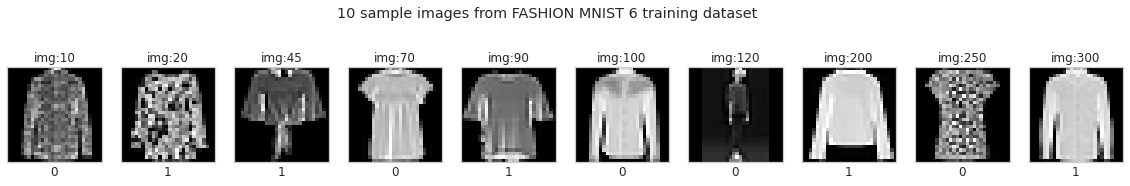

In [21]:
#Display sample images from FASHION MNIST 6 training dataset
image_index = [10, 20, 45, 70, 90, 100, 120, 200, 250, 300]
display_images(X_data_mnist6, image_index, IMAGE_SIZE_MNIST_6,
               "10 sample images from FASHION MNIST 6 training dataset",
              y_data_mnist6)

##### 2.2.4 FASHION MNIST 6 test dataset

FASHION MNIST 6 test dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 1, 28, 28)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


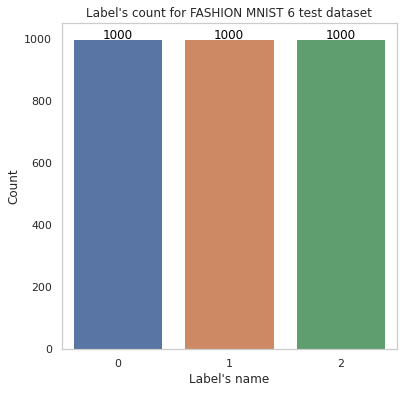

In [22]:
#FASHION MNIST 6 Test dataset
print_ida_summary("FASHION MNIST 6", "test", X_test_mnist3, y_test_mnist3)

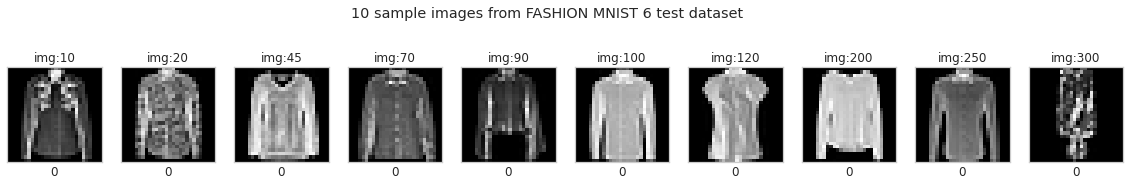

In [23]:
#Display sample images from FASHION MNIST 6 test dataset
image_index = [10, 20, 45, 70, 90, 100, 120, 200, 250, 300]
display_images(X_test_mnist6, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 test dataset",
              y_test_mnist6)

##### 2.2.5 CIFAR training dataset

CIFAR training dataset
Number of labels: 3
Number of images: 15000
Shape of dataset: (15000, 3, 32, 32)
Shape of labels: (15000,)
Minimum pixel value: 0, Maximum pixel value:255


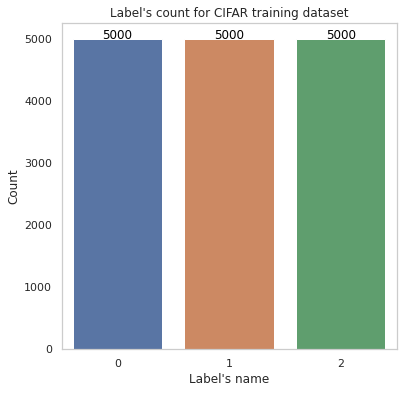

In [24]:
#CIFAR training dataset
print_ida_summary("CIFAR", "training", X_data_cifar, y_data_cifar)

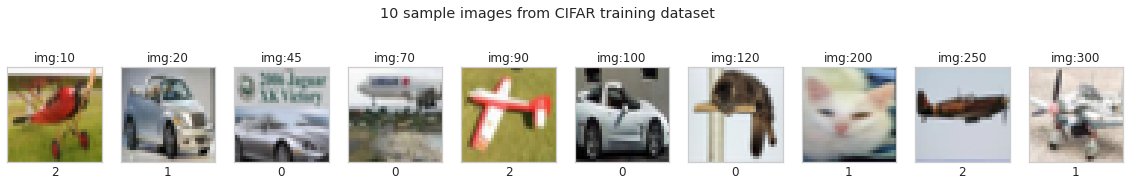

In [25]:
#Display sample images from CIFAR training dataset
image_index = [10, 20, 45, 70, 90, 100, 120, 200, 250, 300]
display_images(X_data_cifar, image_index, None, 
               "10 sample images from CIFAR training dataset",
              y_data_cifar)

##### 2.2.6 CIFAR test dataset

CIFAR test dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 1, 28, 28)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


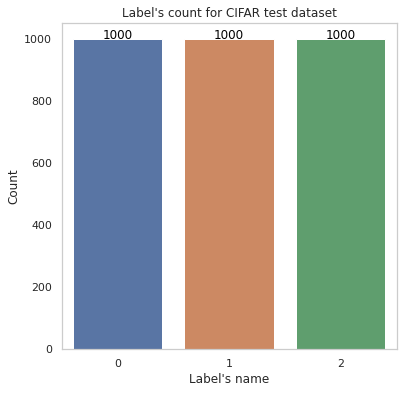

In [26]:
#CIFAR test dataset
print_ida_summary("CIFAR", "test", X_test_mnist3, y_test_mnist3)

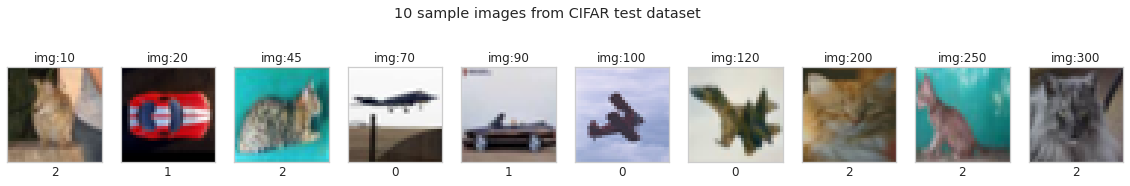

In [27]:
#Display sample images from CIFAR test dataset
image_index = [10, 20, 45, 70, 90, 100, 120, 200, 250, 300]
display_images(X_test_cifar, image_index, None, 
               "10 sample images from CIFAR test dataset",
              y_test_cifar)

### 3. Split Training and Validation data

https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

FASHION MNIST 3 training dataset
Number of labels: 3
Number of images: 14400
Shape of dataset: (14400, 1, 28, 28)
Shape of labels: (14400,)
Minimum pixel value: 0, Maximum pixel value:255


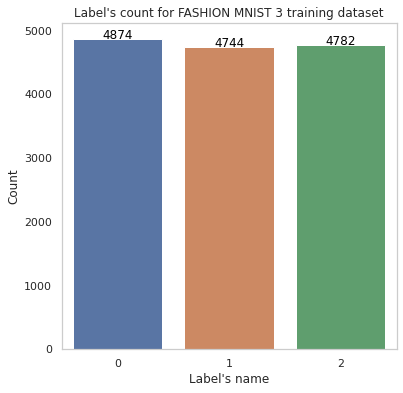

In [28]:
#Split the training data into training and validation data for FASHION MNIST 3 dataset
X_train_mnist3, X_val_mnist3, y_train_mnist3, y_val_mnist3 = train_test_split(X_data_mnist3, y_data_mnist3, 
                                                                              test_size = 0.20, 
                                                                              stratify = y_data_mnist3)

print_ida_summary("FASHION MNIST 3", "training", X_train_mnist3, y_train_mnist3)

FASHION MNIST 3 validation dataset
Number of labels: 3
Number of images: 3600
Shape of dataset: (3600, 1, 28, 28)
Shape of labels: (3600,)
Minimum pixel value: 0, Maximum pixel value:255


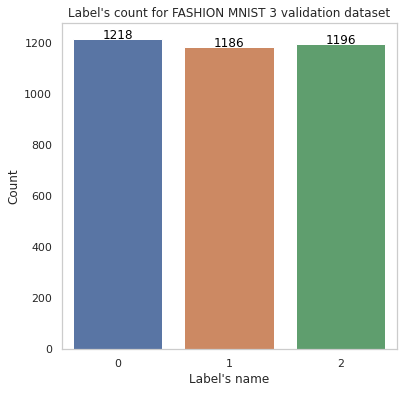

In [29]:
print_ida_summary("FASHION MNIST 3", "validation", X_val_mnist3, y_val_mnist3)

FASHION MNIST 3 test dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 1, 28, 28)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


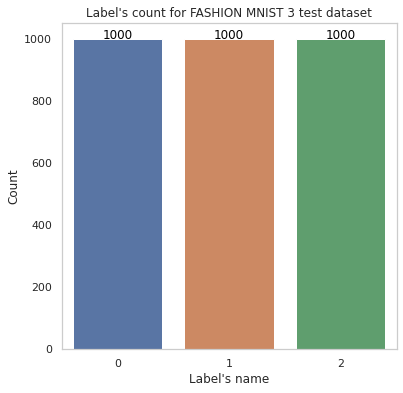

In [30]:
print_ida_summary("FASHION MNIST 3", "test", X_test_mnist3, y_test_mnist3)

FASHION MNIST 6 training dataset
Number of labels: 3
Number of images: 14400
Shape of dataset: (14400, 1, 28, 28)
Shape of labels: (14400,)
Minimum pixel value: 0, Maximum pixel value:255


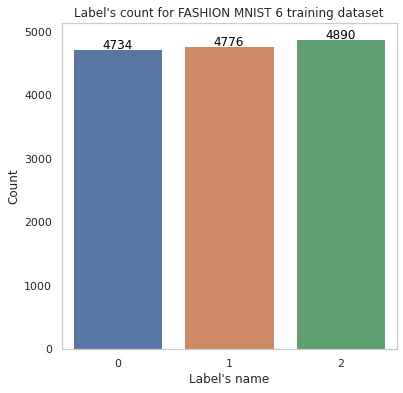

In [31]:
#Split the training data into training and validation data for FASHION MNIST 6 dataset
X_train_mnist6, X_val_mnist6, y_train_mnist6, y_val_mnist6 = train_test_split(X_data_mnist6, y_data_mnist6, 
                                                                              test_size=0.20, 
                                                                              stratify = y_data_mnist6)

print_ida_summary("FASHION MNIST 6", "training", X_train_mnist6, y_train_mnist6)

FASHION MNIST 6 validation dataset
Number of labels: 3
Number of images: 3600
Shape of dataset: (3600, 1, 28, 28)
Shape of labels: (3600,)
Minimum pixel value: 0, Maximum pixel value:255


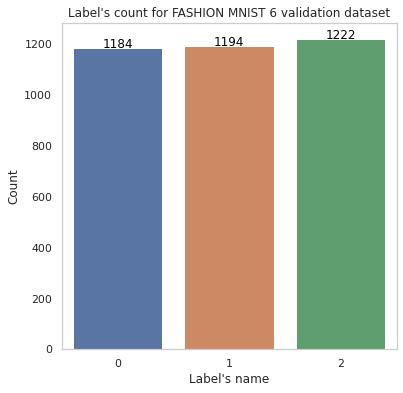

In [32]:
print_ida_summary("FASHION MNIST 6", "validation", X_val_mnist6, y_val_mnist6)

FASHION MNIST 6 test dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 1, 28, 28)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


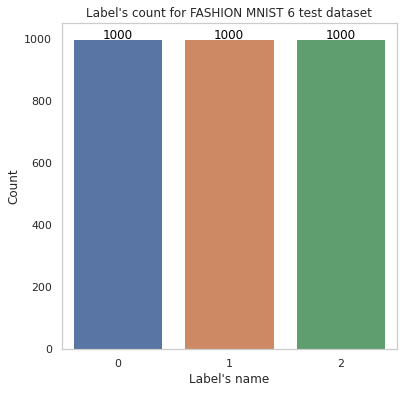

In [33]:
print_ida_summary("FASHION MNIST 6", "test", X_test_mnist6, y_test_mnist6)

CIFAR training dataset
Number of labels: 3
Number of images: 12000
Shape of dataset: (12000, 3, 32, 32)
Shape of labels: (12000,)
Minimum pixel value: 0, Maximum pixel value:255


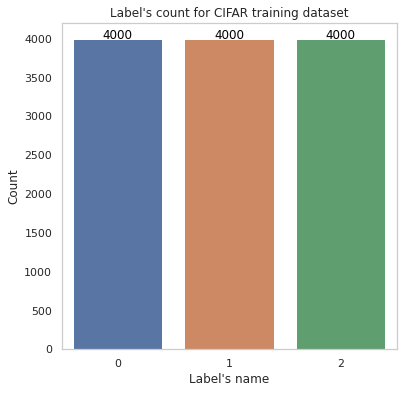

In [34]:
#Split the training data into training and validation data for CIFAR dataset
X_train_cifar, X_val_cifar, y_train_cifar, y_val_cifar = train_test_split(X_data_cifar, y_data_cifar, 
                                                                              test_size=0.20, 
                                                                              stratify = y_data_cifar)

print_ida_summary("CIFAR", "training", X_train_cifar, y_train_cifar)

CIFAR validation dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 3, 32, 32)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


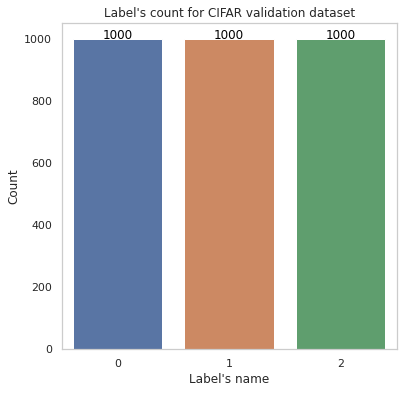

In [35]:
print_ida_summary("CIFAR", "validation", X_val_cifar, y_val_cifar)

CIFAR test dataset
Number of labels: 3
Number of images: 3000
Shape of dataset: (3000, 3, 32, 32)
Shape of labels: (3000,)
Minimum pixel value: 0, Maximum pixel value:255


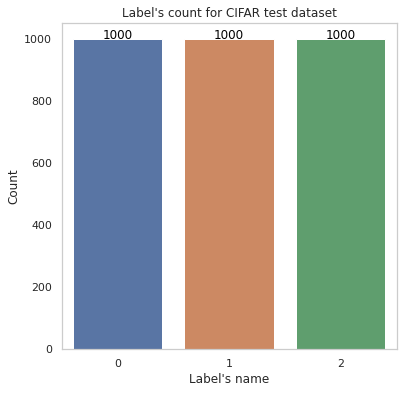

In [36]:
print_ida_summary("CIFAR", "test", X_test_cifar, y_test_cifar)

### 4. Pre-Processing
https://www.section.io/engineering-education/image-preprocessing-in-python/

https://freecontent.manning.com/the-computer-vision-pipeline-part-3-image-preprocessing/

https://www.codecademy.com/articles/normalization

In [37]:
class ImagePreProcessing:
    """
    This class defines different methods to scale the image pixels based on the scaling 
    type passed to it.
    """
    
    def standardize_image(self, dataset, is_train = False):
        """
        This method standardizes the image pixels for the given
        dataset for mean value 0 and standard deviation 1. It stores 
        the mean and standard deviation value from training data to 
        standardize validation/test dataset.

        param type: array
        param dataset: Image dataset to standardize
        
        param type: boolean
        param is_train: Flag to indicate if the dataset is having training data.
        
        type output: array
        output: Standardized image pixel's array for dataset
        """
        try:
            dataset = dataset.astype('float32')
            
            # Calculate mean and standard deviation from training data.
            if is_train == True:
                self.mean = dataset.mean(axis = 0)
                self.std = dataset.std(axis = 0)
            
            dataset = ((dataset - self.mean) / self.std)
            
            return dataset    
        except: 
            traceback.print_exception(*sys.exc_info())

    def normalize_image(self, dataset):
        """
        This method normalizes the image pixels for the given dataset 
        between the range of 0 to 1. 

        param type: array
        param dataset: Image dataset to normalize
        
        type output: array
        output: Normalized image pixel's array for dataset
        """
        try:
            dataset = dataset.astype('float32')
            dataset /= 255.0
            
            return dataset            
        except: 
            traceback.print_exception(*sys.exc_info())
            
    def gray_scale_image(self, dataset):
        """
        This method converts the image to gray scale

        param type: array
        param dataset: Image dataset to convert to gray scale
        
        type output: array
        output: Gray scaled image pixel's array for dataset
        """
        try:
            dataset_grayed = rgb2gray(dataset)
            
            return dataset_grayed
            
        except: 
            traceback.print_exception(*sys.exc_info())

#### 4.1 FASHION MNIST 3 dataset

Minimum pixel value: -2.5986666679382324, Maximum pixel value:117.62340545654297 for training data
Minimum pixel value: -2.5986666679382324, Maximum pixel value:77.30448913574219 for validation data
Minimum pixel value: -2.5986666679382324, Maximum pixel value:565.5064086914062 for test data


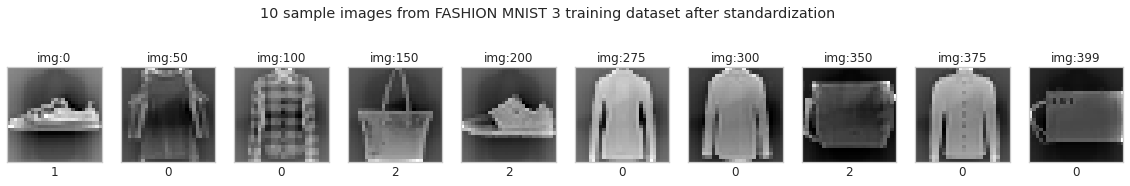

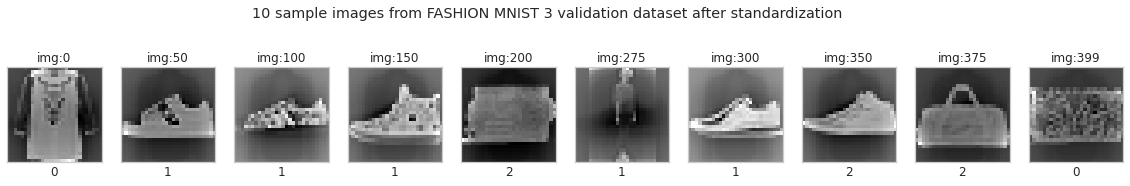

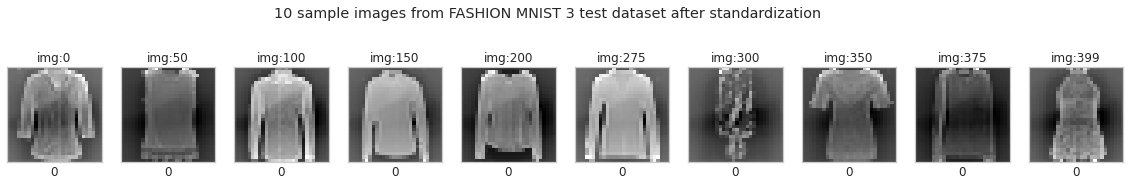

In [38]:
#Standardization of training, validation and test data

image_pre_processing = ImagePreProcessing()
X_train_mnist3_std = image_pre_processing.standardize_image(X_train_mnist3, is_train = True)
X_val_mnist3_std = image_pre_processing.standardize_image(X_val_mnist3)
X_test_mnist3_std = image_pre_processing.standardize_image(X_test_mnist3)

print("Minimum pixel value: {0}, Maximum pixel value:{1} for training data".format(X_train_mnist3_std.min(), 
                                                                                   X_train_mnist3_std.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for validation data".format(X_val_mnist3_std.min(), 
                                                                                   X_val_mnist3_std.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for test data".format(X_test_mnist3_std.min(),
                                                                               X_test_mnist3_std.max()))

# Explore few sample images after pre-processing
image_index = [0, 50, 100, 150, 200, 275, 300, 350, 375, 399]
display_images(X_train_mnist3_std, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 training dataset after standardization",
              y_train_mnist3)

display_images(X_val_mnist3_std, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 validation dataset after standardization",
              y_val_mnist3)

display_images(X_test_mnist3_std, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 test dataset after standardization",
              y_test_mnist3)

Minimum pixel value: 0.0, Maximum pixel value:1.0 for training data
Minimum pixel value: 0.0, Maximum pixel value:1.0 for validation data
Minimum pixel value: 0.0, Maximum pixel value:1.0 for test data


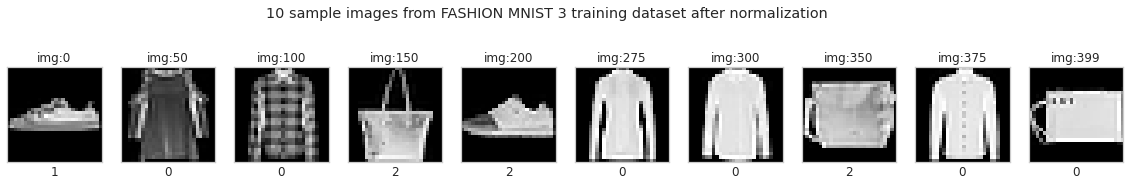

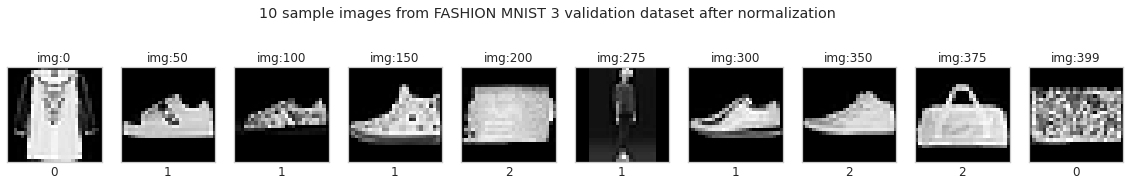

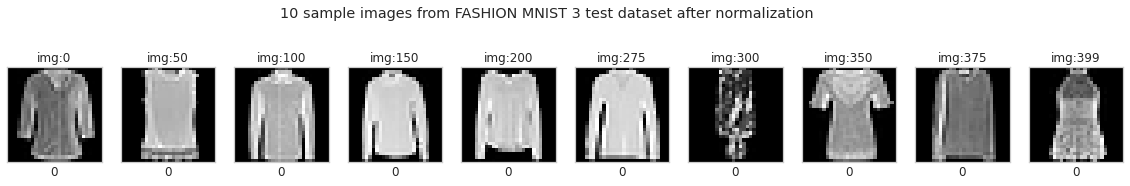

In [39]:
#Normalization of training, validation and test data

image_pre_processing = ImagePreProcessing()
X_train_mnist3_norm = image_pre_processing.normalize_image(X_train_mnist3)
X_val_mnist3_norm = image_pre_processing.normalize_image(X_val_mnist3)
X_test_mnist3_norm = image_pre_processing.normalize_image(X_test_mnist3)

print("Minimum pixel value: {0}, Maximum pixel value:{1} for training data".format(X_train_mnist3_norm.min(), 
                                                                                   X_train_mnist3_norm.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for validation data".format(X_val_mnist3_norm.min(), 
                                                                                   X_val_mnist3_norm.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for test data".format(X_test_mnist3_norm.min(),
                                                                               X_test_mnist3_norm.max()))

# Explore few sample images after pre-processing
image_index = [0, 50, 100, 150, 200, 275, 300, 350, 375, 399]
display_images(X_train_mnist3_norm, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 training dataset after normalization",
              y_train_mnist3)

display_images(X_val_mnist3_norm, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 validation dataset after normalization",
              y_val_mnist3)

display_images(X_test_mnist3_norm, image_index, IMAGE_SIZE_MNIST_3, 
               "10 sample images from FASHION MNIST 3 test dataset after normalization",
              y_test_mnist3)

#### 4.2 FASHION MNIST 6 dataset

Minimum pixel value: -2.6218020915985107, Maximum pixel value:109.10598754882812 for training data
Minimum pixel value: -2.6218020915985107, Maximum pixel value:506.6768798828125 for validation data
Minimum pixel value: -2.6218020915985107, Maximum pixel value:1890.7064208984375 for test data


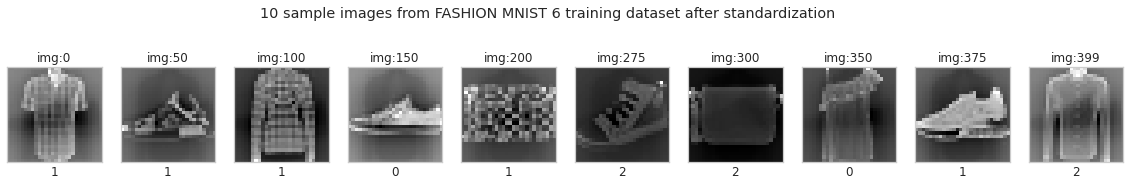

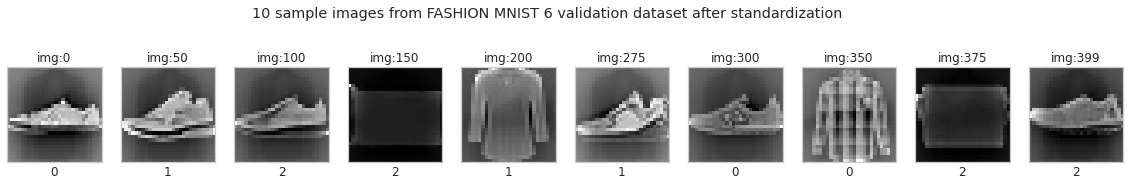

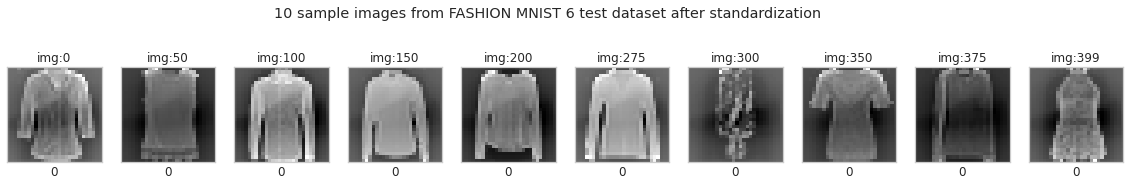

In [40]:
#Standardization of training, validation and test data

image_pre_processing = ImagePreProcessing()
X_train_mnist6_std = image_pre_processing.standardize_image(X_train_mnist6, is_train = True)
X_val_mnist6_std = image_pre_processing.standardize_image(X_val_mnist6)
X_test_mnist6_std = image_pre_processing.standardize_image(X_test_mnist6)

print("Minimum pixel value: {0}, Maximum pixel value:{1} for training data".format(X_train_mnist6_std.min(), 
                                                                                   X_train_mnist6_std.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for validation data".format(X_val_mnist6_std.min(), 
                                                                                   X_val_mnist6_std.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for test data".format(X_test_mnist6_std.min(),
                                                                               X_test_mnist6_std.max()))

# Explore few sample images after pre-processing
image_index = [0, 50, 100, 150, 200, 275, 300, 350, 375, 399]
display_images(X_train_mnist6_std, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 training dataset after standardization",
              y_train_mnist6)

display_images(X_val_mnist6_std, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 validation dataset after standardization",
              y_val_mnist6)

display_images(X_test_mnist3_std, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 test dataset after standardization",
              y_test_mnist6)

Minimum pixel value: 0.0, Maximum pixel value:1.0 for training data
Minimum pixel value: 0.0, Maximum pixel value:1.0 for validation data
Minimum pixel value: 0.0, Maximum pixel value:1.0 for test data


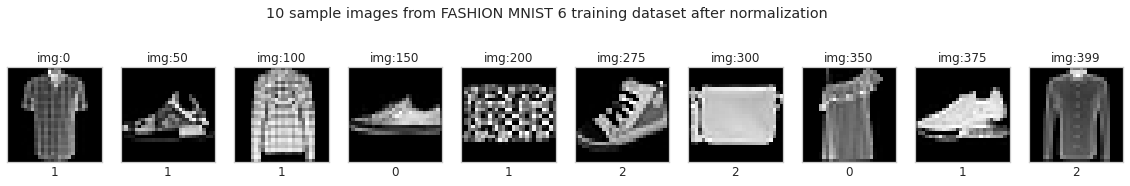

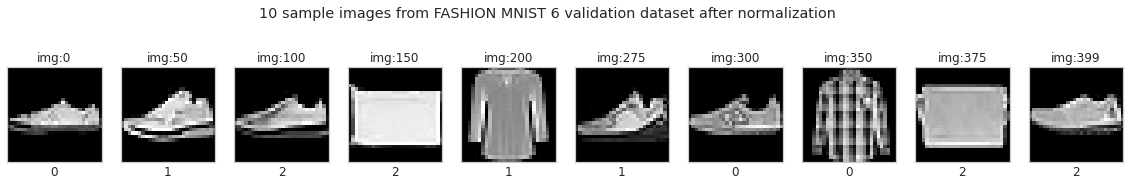

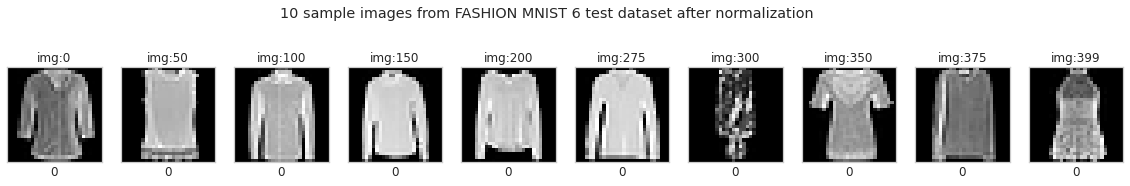

In [41]:
#Normalization of training, validation and test data

image_pre_processing = ImagePreProcessing()
X_train_mnist6_norm = image_pre_processing.normalize_image(X_train_mnist6)
X_val_mnist6_norm = image_pre_processing.normalize_image(X_val_mnist6)
X_test_mnist6_norm = image_pre_processing.normalize_image(X_test_mnist6)

print("Minimum pixel value: {0}, Maximum pixel value:{1} for training data".format(X_train_mnist6_norm.min(), 
                                                                                   X_train_mnist6_norm.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for validation data".format(X_val_mnist6_norm.min(), 
                                                                                   X_val_mnist6_norm.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for test data".format(X_test_mnist6_norm.min(),
                                                                               X_test_mnist6_norm.max()))

# Explore few sample images after pre-processing
image_index = [0, 50, 100, 150, 200, 275, 300, 350, 375, 399]
display_images(X_train_mnist6_norm, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 training dataset after normalization",
              y_train_mnist6)

display_images(X_val_mnist6_norm, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 validation dataset after normalization",
              y_val_mnist6)

display_images(X_test_mnist6_norm, image_index, IMAGE_SIZE_MNIST_6, 
               "10 sample images from FASHION MNIST 6 test dataset after normalization",
              y_test_mnist6)

#### 4.3 CIFAR dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Minimum pixel value: -2.1089324951171875, Maximum pixel value:2.3744988441467285 for training data
Minimum pixel value: -2.1089324951171875, Maximum pixel value:2.3744988441467285 for validation data
Minimum pixel value: -2.1089324951171875, Maximum pixel value:2.3744988441467285 for test data


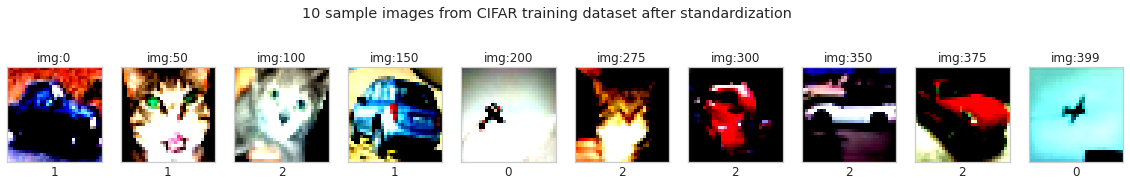

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

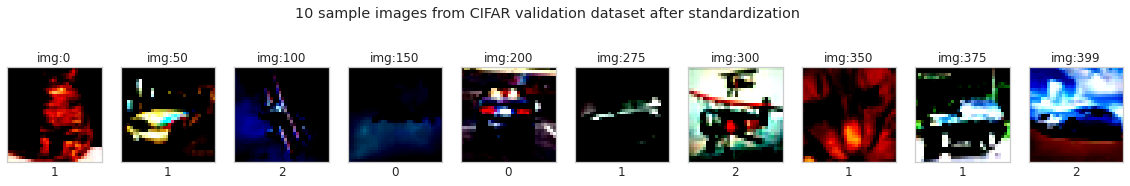

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

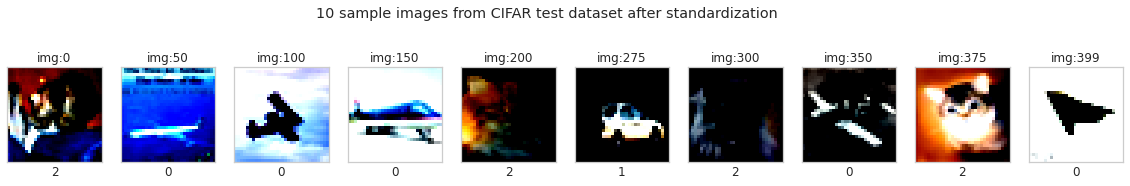

In [42]:
#Standardization of training, validation and test data

image_pre_processing = ImagePreProcessing()
X_train_cifar_std = image_pre_processing.standardize_image(X_train_cifar, is_train = True)
X_val_cifar_std = image_pre_processing.standardize_image(X_val_cifar)
X_test_cifar_std = image_pre_processing.standardize_image(X_test_cifar)

print("Minimum pixel value: {0}, Maximum pixel value:{1} for training data".format(X_train_cifar_std.min(), 
                                                                                   X_train_cifar_std.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for validation data".format(X_val_cifar_std.min(), 
                                                                                   X_val_cifar_std.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for test data".format(X_test_cifar_std.min(),
                                                                               X_test_cifar_std.max()))

# Explore few sample images after pre-processing
image_index = [0, 50, 100, 150, 200, 275, 300, 350, 375, 399]
display_images(X_train_cifar_std, image_index, None, 
               "10 sample images from CIFAR training dataset after standardization",
              y_train_cifar)

display_images(X_val_cifar_std, image_index, None, 
               "10 sample images from CIFAR validation dataset after standardization",
              y_val_cifar)

display_images(X_test_cifar_std, image_index, None, 
               "10 sample images from CIFAR test dataset after standardization",
              y_test_cifar)

Minimum pixel value: 0.0, Maximum pixel value:1.0 for training data
Minimum pixel value: 0.0, Maximum pixel value:1.0 for validation data
Minimum pixel value: 0.0, Maximum pixel value:1.0 for test data


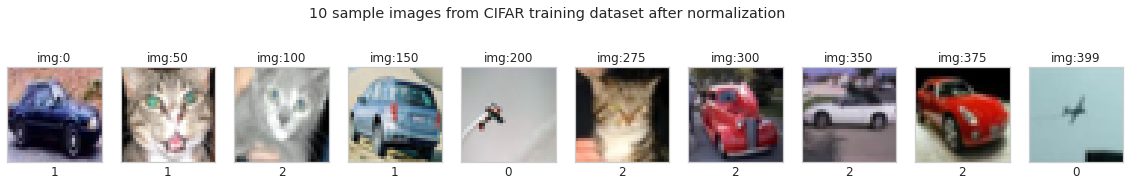

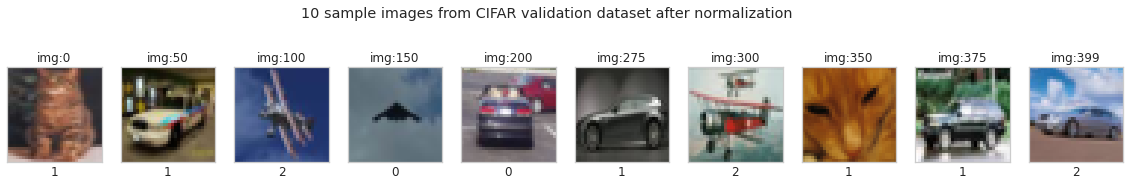

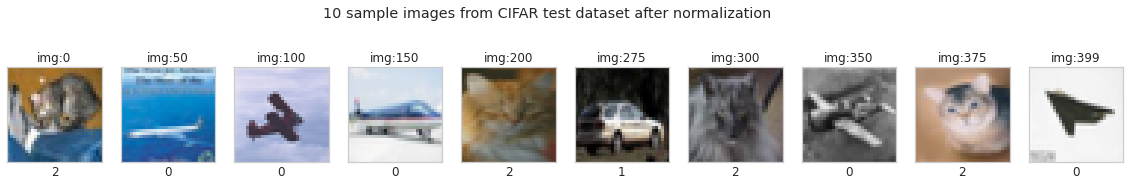

In [43]:
#Normalization of training, validation and test data

image_pre_processing = ImagePreProcessing()
X_train_cifar_norm = image_pre_processing.normalize_image(X_train_cifar)
X_val_cifar_norm = image_pre_processing.normalize_image(X_val_cifar)
X_test_cifar_norm = image_pre_processing.normalize_image(X_test_cifar)

print("Minimum pixel value: {0}, Maximum pixel value:{1} for training data".format(X_train_cifar_norm.min(), 
                                                                                   X_train_cifar_norm.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for validation data".format(X_val_cifar_norm.min(), 
                                                                                   X_val_cifar_norm.max()))
print("Minimum pixel value: {0}, Maximum pixel value:{1} for test data".format(X_test_cifar_norm.min(),
                                                                               X_test_cifar_norm.max()))

# Explore few sample images after pre-processing
image_index = [0, 50, 100, 150, 200, 275, 300, 350, 375, 399]
display_images(X_train_cifar_norm, image_index, None, 
               "10 sample images from CIFAR training dataset after normalization",
              y_train_cifar)

display_images(X_val_cifar_norm, image_index, None, 
               "10 sample images from CIFAR validation dataset after normalization",
              y_val_cifar)

display_images(X_test_cifar_norm, image_index, None, 
               "10 sample images from CIFAR test dataset after normalization",
              y_test_cifar)

### 5. Transition Matrix

In [44]:
def transition_matrix_error(etimated_t_matrix, true_t_matrix):
    """
    This method calculates the difference between the true transition matrix and the
    estimated transition matrix

    param type: array
    param etimated_t_matrix: Estimated transition matrix

    param type: array
    param true_t_matrix: True transition matrix

    param output: decimal
    output: Error as the measure of difference between true and estimated transition matrix
    """
    error = torch.sum(torch.abs(etimated_t_matrix - true_t_matrix)) / torch.sum(torch.abs(true_t_matrix))
    return error

#https://github.com/xiaoboxia/T-Revision/blob/master/tools.py

#### 5.1 Transition Matrix for FASHION MNIST3 dataset

In [45]:
t_matrix_mnist3 =  torch.tensor([[0.7, 0.3, 0], [0, 0.7, 0.3], [0.3, 0, 0.7]])
print(t_matrix_mnist3.shape)
print(t_matrix_mnist3)

#https://pytorch.org/docs/stable/tensors.html

torch.Size([3, 3])
tensor([[0.7000, 0.3000, 0.0000],
        [0.0000, 0.7000, 0.3000],
        [0.3000, 0.0000, 0.7000]])


#### 5.2 Transition Matrix for FASHION MNIST6 dataset

In [46]:
t_matrix_mnist6 =  torch.tensor([[0.4, 0.3, 0.3], [0.3, 0.4, 0.3], [0.3, 0.3, 0.4]])
print(t_matrix_mnist6.shape)
print(t_matrix_mnist6)

torch.Size([3, 3])
tensor([[0.4000, 0.3000, 0.3000],
        [0.3000, 0.4000, 0.3000],
        [0.3000, 0.3000, 0.4000]])


#### 5.3 Transition Matrix for CIFAR dataset

In [47]:
def transition_matrix_estimator(classifier_model, model_name, dataloader):
    """
    This method estimates the transition matrix.

    param type: Model Classifier 
    param classifier_model: The object of the model classifier class 

    param type: string
    param model_name: Name of the best model saved after training of data

    param type: DataLoader
    param dataloader: Training data loader  

    param output: array
    output: Estimated transition matrix
    """
    if use_cuda == True:
        classifier_model.model = classifier_model.model.to(device)
    classifier_model.model.load_state_dict(torch.load(os.path.join("/content/drive/MyDrive/COMP5328-AdvancedML/models/", model_name)))
   
    classifier_model.model.eval()
    probabilities = []
    transition_matrix = np.empty((3, 3))

    for step, (data, targets, index) in enumerate(dataloader):
        if use_cuda == True:
            data = data.to(device)
            targets = targets.to(device)

        with torch.no_grad():
            yhat = classifier_model.model(data)

        if len(probabilities) == 0:
            probabilities =  yhat.detach().cpu()
        else:
            probabilities = np.vstack((probabilities, yhat.detach().cpu()))

    for i in np.arange(3):
        index_best = np.argmax(probabilities[:, i])
        for j in np.arange(3):            
            transition_matrix[i, j] = probabilities[index_best, j]   
    
    transition_matrix /= transition_matrix.sum(axis=1)[:, np.newaxis]
    return torch.tensor(transition_matrix, dtype = torch.float32)
       
#https://github.com/giorgiop/loss-correction

### 6. Classification Algorithms

#### 6.1 Dataloader setup

In [48]:
class CustomDataset(Dataset):
    """
    This is a custom dataset class.
    """
    
    def __init__(self, data, labels, transform = None):
        """
        This method sets the data and labels passed to it.

        param type: array
        param data: Image data array

        param type: array
        param labels: array of labels

        param type: transformer object
        param transforms: transformation details to be applied to the image data
        """
        
        self.data = data.astype(np.float32)
        self.labels = labels.astype(np.long)
        self.transform = transform

    def __len__(self):
        """
        This method returns the length of the image data.

        param output: int
        output: Length of the image data
        """
        return len(self.data)

    def __getitem__(self, index):
        """
        This method returns the image data and label for the index passed to it. 
        It also applies the transformation on the image is it was passed to init 
        method.

        param type: int
        param index: Index for which the image and label should be returned.

        param output: tuple
        output: Image data and label for the index passed to it.
        """
        image = self.data[index]
        label = self.labels[index]
        
        if self.transform is not None:
            image = self.transform(image)
        label = label
            
        return (image, label, index)
    
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
#https://discuss.pytorch.org/t/index-concept-in-torch-utils-data-dataloader/72449/4

In [49]:
# Set the batch size and number of workers for the dataloader class
BATCH_SIZE = 64
NUMBER_OF_WORKERS = 2

In [50]:
train_transforms_mnist = transforms.Compose([  
                                             transforms.ToTensor(), 
                                             transforms.Normalize((0.1307, ),(0.3081, ))                                 
])

test_transforms_mnist = transforms.Compose([
                                            transforms.ToTensor(), 
                                            transforms.Normalize((0.1307, ),(0.3081, ))                                      
])

train_transforms_cifar = transforms.Compose([                                              
                                             transforms.ToTensor(),
                                             transforms.RandomCrop(32, padding=4),
                                             transforms.RandomHorizontalFlip(),
                                             transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2023, 0.1994, 0.2010)),                                
])

test_transforms_cifar = transforms.Compose([
                                            transforms.ToTensor(), 
                                            transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2023, 0.1994, 0.2010))                                      
])

#https://github.com/xiaoboxia/T-Revision

In [51]:
X_train_mnist3.shape

(14400, 1, 28, 28)

In [52]:
# DataLoader class for efficient loading of FASHION MNIST3 dataset.
train_loader_mnist3 = DataLoader(CustomDataset(X_train_mnist3_norm, y_train_mnist3), 
                                 shuffle = True, 
                                 batch_size = BATCH_SIZE, 
                                 num_workers = NUMBER_OF_WORKERS)

val_loader_mnist3 = DataLoader(CustomDataset(X_val_mnist3_norm, y_val_mnist3), 
                               shuffle = False, 
                               batch_size = BATCH_SIZE, 
                               num_workers = NUMBER_OF_WORKERS)

test_loader_mnist3 = DataLoader(CustomDataset(X_test_mnist3_norm, y_test_mnist3), 
                                shuffle = False,
                                batch_size = BATCH_SIZE,
                                num_workers = NUMBER_OF_WORKERS)

In [53]:
# DataLoader class for efficient loading of FASHION MNIST6 dataset.
train_loader_mnist6 = DataLoader(CustomDataset(X_train_mnist6_norm, y_train_mnist6), 
                                 shuffle = True, 
                                 batch_size= BATCH_SIZE, 
                                 num_workers = NUMBER_OF_WORKERS)

val_loader_mnist6 = DataLoader(CustomDataset(X_val_mnist6_norm, y_val_mnist6), 
                               shuffle = False, 
                               batch_size= BATCH_SIZE, 
                               num_workers = NUMBER_OF_WORKERS)

test_loader_mnist6 = DataLoader(CustomDataset(X_test_mnist6_norm, y_test_mnist6), 
                                shuffle = False,
                                batch_size= BATCH_SIZE,
                                num_workers = NUMBER_OF_WORKERS)


In [54]:
# DataLoader class for efficient loading of CIFAR dataset.
train_loader_cifar = DataLoader(CustomDataset(X_train_cifar_norm, y_train_cifar), 
                                 shuffle = True, 
                                 batch_size= BATCH_SIZE, 
                                 num_workers = NUMBER_OF_WORKERS)

val_loader_cifar = DataLoader(CustomDataset(X_val_cifar_norm, y_val_cifar), 
                               shuffle = False, 
                               batch_size= BATCH_SIZE, 
                               num_workers = NUMBER_OF_WORKERS)

test_loader_cifar = DataLoader(CustomDataset(X_test_cifar_norm, y_test_cifar), 
                                shuffle = False,
                                batch_size= BATCH_SIZE,
                                num_workers = NUMBER_OF_WORKERS)

In [55]:
train_mnist3_images, train_mnist3_labels, index = next(iter(train_loader_mnist3))
print(train_mnist3_images.shape)
print(train_mnist3_labels.shape)

train_mnist6_images, train_mnist6_labels, index = next(iter(train_loader_mnist6))
print(train_mnist6_images.shape)
print(train_mnist6_labels.shape)

train_cifar_images, train_cifar_labels, index = next(iter(train_loader_cifar))
print(train_cifar_images.shape)
print(train_cifar_labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])


#### 6.2 Helper Methods

In [56]:
def seed_torch(seed=1029):
    r"""Fix all random seeds for repeating the expriement result."""
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # If multi-GPUs are used. 
    torch.cuda.manual_seed_all(seed) 
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

# Embedding labels to one-hot form.
def one_hot_embedding(labels, num_classes):
    r"""Embedding labels to one-hot form.

    Args:
      labels: (LongTensor) class labels, sized [N,].
      num_classes: (int) number of classes.

    Returns:
      (tensor) encoded labels, sized [N, #classes].
    """
    y = torch.eye(num_classes) 
    return y[labels] 
    
# Calcuate the accuracy according to the prediction and the true label.
def accuracy(output, target, topk=(1,)):
    r"""Computes the precision@k for the specified values of k."""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, num):
        self.val = val
        self.sum += val * num
        self.count += num
        self.avg = self.sum / self.count

#### 6.3 Models

In [57]:
class MLPClassifier(nn.Module):
    """
    This class implements an MLP as a classifier for the datasets
    """

    def __init__(self, num_input):
        """
        This methos initializes the MLP network
        
        param type: int
        param num_input: Number of input to the network
        """
        super(MLPClassifier, self).__init__()
        
        self.input_layer = nn.Linear(num_input, 1024)
        kaiming_uniform_(self.input_layer.weight, nonlinearity = 'relu')
        self.activation_func1 = ReLU()
        
        self.hidden1 = nn.Linear(1024, 2048)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.activation_func2 = ReLU()

        self.hidden2 = nn.Linear(2048, 2048)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.activation_func3 = ReLU()
        
        self.output_layer = nn.Linear(2048, 3)
        xavier_uniform_(self.output_layer.weight)
        self.activation_func4 = nn.Softmax(dim = 1)
 
    def forward(self, X):
        """
        This method implements the forward pass of the MLP

        param type: array
        param X: Input array

        param output: array
        output: Output propabilities
        """
        output = self.input_layer(X)
        output = self.activation_func1(output)
        
        output = self.hidden1(output)
        output = self.activation_func2(output)

        output = self.hidden2(output)
        output = self.activation_func3(output)
       
        output = self.output_layer(output)
        output = self.activation_func4(output)
        return output

In [58]:
class Lenet(nn.Module):
    def __init__(self):
        super(Lenet, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5,stride=1,padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(400, 120)
        self.fc2   = nn.Linear(120, 84)
        #self.fc3   = nn.Linear(84, 3)
        self.fc3 = nn.Sequential( nn.BatchNorm1d(84), 
                                  nn.Dropout(0.35),                                                                                   
                                  nn.Linear(84, 1024),
                                  nn.ReLU(),
                                  nn.BatchNorm1d(1024),
                                  nn.Dropout(0.25),
                                  nn.Linear(1024, 3))       

       
    def forward(self, x):        
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        out = F.softmax(out, dim = 1)
        return out

#https://github.com/xiaoboxia/T-Revision/blob/master/Lenet.py

#### 6.4 Classifier and Loss Implementation

In [59]:
class ELRLoss(nn.Module):
    """
    This class implements the early learning loss method. The code is based on the paper
    https://arxiv.org/pdf/2007.00151.pdf about Early Learning loss and its code 
    https://github.com/shengliu66/ELR/blob/c93fe057c1a3d898355a25763eb470eb31bab9ef/ELR/model/loss.py
    """
    def __init__(self, num_examples, num_classes = 3, beta = 0.3, lambda_ = 3):
        """
        This method initializes the configuration parameters for calculating the ELR.

        param type: int
        param num_examples: Number of datapoints

        param type: int
        param num_classes: Number of classess/labels

        param type: float
        param beta: momentum for target estimation

        param type: int
        param lambda_: Regularization coefficient
        """
        super(ELRLoss, self).__init__()
        self.num_classes = num_classes
        self.target = torch.zeros(num_examples, self.num_classes) .to(device) if use_cuda else torch.zeros(num_examples, self.num_classes)
        self.beta = beta
        self.lambda_ = lambda_        

    def forward(self, index, y_pred, y_true): 
        """
        This method calculates the ELR.
        
        param type: array
        param y_pred: Array of indexes of the datapoints

        param type: array
        param y_pred: Array of Softmax predictions

        param type: array
        param y_true: Array of actual labels

        param output: float
        output: ELR loss calculated over the batch size
        """    
        y_pred = torch.clamp(y_pred, 1e-4, 1.0-1e-4)
        y_pred_ = y_pred.data.detach()

        self.target[index] = self.beta * self.target[index] + (1-self.beta) * ((y_pred_)/(y_pred_).sum(dim=1,keepdim=True))
        
        ce_loss = nn.NLLLoss()(y_pred.log(), y_true)
        elr_reg = ((1-(self.target[index] * y_pred).sum(dim=1)).log()).mean()
        final_loss = ce_loss +  self.lambda_ * elr_reg
        return final_loss

#https://github.com/shengliu66/ELR/blob/c93fe057c1a3d898355a25763eb470eb31bab9ef/ELR/model/loss.py

In [60]:
class ImageClassifier:

    def forward_loss(self, y_pred, y_true):
        """
        This method implements the forward loss method.

        param type: array
        param y_pred: Array of Softmax predictions

        param type: array
        param y_true: Array of actual labels

        param output: float
        output: Forward loss calculated over the batch size
        """   
        if use_cuda == True:         
            self.transition_matrix = self.transition_matrix.to(device)
        
        epsilon = 1e-07
        y_pred = torch.clip(y_pred, epsilon, 1.0 - epsilon)
        prob_t_matrix = y_pred.mm(self.transition_matrix)                                   
        return self.criterion(prob_t_matrix.log(), y_true)    

        #epsilon = 1e-07
        #y_true_ohe = one_hot_embedding(y_true, 3)
        #y_pred /= torch.sum(y_pred, axis = 1, keepdims=True)
        #y_pred = torch.clip(y_pred, epsilon, 1.0 - epsilon)
        #return torch.mean((-torch.sum(y_true_ohe * np.log(np.dot(y_pred, self.transition_matrix)), axis = 1)))

    """
    This class contains the methods for training and validating the models.
    """

    def set_requires_grad(self, requires_grad = False):
        """
        This method assigns value to requires_grad parameter of the model. If its 
        true, the model learns during the training phase otherwise uses its pre-trained 
        values.

        param type: boolean
        param requires_grad = True/False value for requires_grad parameter.
        """
        for param in self.model.parameters():
            param.requires_grad = requires_grad

    def __init__(self, model_name, transition_matrix = None, loss_type = "cross_entropy"):
        """
        This method initializes the model and its configurations. If the transition_matrix is 
        not passed, the loss function will be CrossEntropyLoss. If the transition_matrix is 
        passed, the loss function will include forward loss.

        param type: String
        param model_name: Name of the model

        param type: array
        param transition_matrix: Transition matrix for calculating forward loss

        param type: string
        param loss_type: Type of the loss function. Possible values are "cross_entropy", 
        "forward" and "elr"
        """
        if model_name == "resnet50_gray_scale":
            self.model = models.resnet50(pretrained = False)
            self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
            self.set_requires_grad(True)
            num_features = self.model.fc.in_features
            self.model.fc = nn.Sequential(                                                                                 
                                          nn.Linear(num_features, 1024),
                                          nn.ReLU(),
                                          nn.Linear(1024, 3),
                                          nn.Softmax(dim = 1)
                                          )    
        elif model_name == "resnet50":
            self.model = models.resnet50(pretrained = False)
            self.set_requires_grad(True)
            num_features = self.model.fc.in_features
            self.model.fc = nn.Sequential(                                                                                 
                                          nn.Linear(num_features, 1024),
                                          nn.ReLU(),
                                          nn.Linear(1024, 3),
                                          nn.Softmax(dim = 1)
                                          )  
        elif model_name == "resnet18":
            self.model = models.resnet18(pretrained = False)
            self.set_requires_grad(True)
            num_features = self.model.fc.in_features
            self.model.fc = nn.Sequential(                                                                                 
                                          nn.Linear(num_features, 3),                                          
                                          nn.Softmax(dim = 1)
                                          )    
        elif model_name == "lenet":
            self.model = Lenet()            

        if use_cuda == True:
            self.model = self.model.to(device)

        self.transition_matrix = transition_matrix
        self.criterion = nn.NLLLoss()  
        self.optimizer = optim.Adam(self.model.parameters(), lr = 0.0001, weight_decay = 0)
        #self.scheduler = lr_scheduler.StepLR(self.optimizer, step_size = 7, gamma = 0.1) 
        self.loss_type = loss_type

    def train(self, dataloader):
        """
        This method trains the model on the training dataset. 

        param type: DataLoader
        param dataloaded: Training data loader object   

        param output: tuple
        output: Tuple containing Top1 accuracy and loss 
        """ 
        top1_acc_meter = AverageMeter()
        loss_meter = AverageMeter()      

        self.model.train()       
        for step, (data, targets, index) in enumerate(dataloader):   
            if use_cuda == True:         
                data = data.to(device)
                targets = targets.to(device)

            self.optimizer.zero_grad()            
            yhat = self.model(data)

            if self.loss_type == "cross_entropy":           
                loss = self.criterion(yhat.log(), targets)                 
            elif self.loss_type == "forward":
                loss = self.forward_loss(yhat, targets)
            elif self.loss_type == "elr":
                loss = self.elr_loss.forward(index.cpu().detach().numpy().tolist(), yhat, targets)
            else:
                # Default loss will be cross entropy loss
                loss = self.criterion(yhat.log(), targets)   

            loss.backward()
            self.optimizer.step()

            # CyclicLR should be executed after each batch           
            #self.scheduler.step()

            # calculate accuracy
            [top1_acc] = accuracy(yhat.detach().cpu(), targets.detach().cpu(), topk=(1,))
            
            # record accuary and cross entropy losss
            min_batch_size = data.size(0)
            top1_acc_meter.update(top1_acc.item(), min_batch_size)
            loss_meter.update(loss.item(), min_batch_size)

        #self.scheduler.step()
        return top1_acc_meter, loss_meter

    def evaluate(self, dataloader, is_test = False):
        """
        This method valuates the model on the validation / training dataset

        param type: DataLoader
        param dataloaded: Validation or test data loader object  

        param type: Boolean
        param is_test: Flag to indicate if the dataloader is for validation or test data  

        param output: tuple
        output: Tuple containing Top1 accuracy and loss 
        """ 
        top1_acc_meter = AverageMeter()
        loss_meter = AverageMeter()

        self.model.eval()
        for step, (data, targets, index) in enumerate(dataloader):
            if use_cuda == True:
                data = data.to(device)
                targets = targets.to(device)

            with torch.no_grad():
                yhat = self.model(data)

            loss = self.criterion(yhat.log(), targets)
    
            [top1_acc] = accuracy(yhat.detach().cpu(), targets.detach().cpu(), topk=(1,))
      
            # record accuary and cross entropy losss
            min_batch_size = data.size(0)
            top1_acc_meter.update(top1_acc.item(), min_batch_size)
            loss_meter.update(loss.item(), min_batch_size)

        return top1_acc_meter, loss_meter

    def fit(self, train_dataloader, val_dataloader, epochs, print_result = False):
        """
        This method fits the model on the dataloader for the number of epochss 
        to find the best model parameters.

        param type: DataLoader
        param train_dataloader: Training data loader object  

        param type: DataLoader
        param val_dataloader: Validation or test data loader object  

        param type: int
        param epochs: Number of epochs  

        param output: tuple
        output: tuple of training and validation accuracy and loss
        """
        self.train_mean_loss = np.zeros(epochs)
        self.train_mean_accuracy = np.zeros(epochs)
        self.val_mean_loss = np.zeros(epochs)
        self.val_mean_accuracy = np.zeros(epochs)          
        self.best_top1_acc = 0

        if self.loss_type == "elr":
            self.elr_loss = ELRLoss(len(train_dataloader.dataset))

        self.best_model_wts = copy.deepcopy(self.model.state_dict())
        for epoch in range(epochs):
            top1_acc_meter_train, loss_meter_train = self.train(train_dataloader)
            self.train_mean_loss[epoch] = loss_meter_train.avg
            self.train_mean_accuracy[epoch] = top1_acc_meter_train.avg

            top1_acc_meter_val, loss_meter_val = self.evaluate(val_dataloader, is_test = False)
            self.val_mean_loss[epoch] = loss_meter_val.avg
            self.val_mean_accuracy[epoch] = top1_acc_meter_val.avg

            if (self.val_mean_accuracy[epoch] > self.best_top1_acc): 
                self.best_top1_acc = self.val_mean_accuracy[epoch]
                self.best_model_wts = copy.deepcopy(self.model.state_dict())

            if print_result == True:
                print("Epoch ({0}/{1}): Train Loss: {2:.4f} Train Accuracy: {3:.2f}% Val Loss: {4:.4f} Val Accuracy: {5:.2f}%".format(
                        epoch + 1, epochs, 
                        self.train_mean_loss[epoch], 
                        self.train_mean_accuracy[epoch], 
                        self.val_mean_loss[epoch], 
                        self.val_mean_accuracy[epoch]))
            
            self.model.load_state_dict(self.best_model_wts)

        return self.train_mean_accuracy, self.train_mean_loss, self.val_mean_accuracy, self.val_mean_loss 

#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
#https://github.com/giorgiop/loss-correction
#https://www.titanwolf.org/Network/q/9dea2bd4-3220-4f43-a348-8a97657cf45b/y

### 7. Result plotting

In [61]:
def plot_result(eval_metrics, plot_param, img_name = None, save_image = False):
    """
    This method plots the average and standard deviation of the evaluation metrics.
    
    param type: dictionary
    param eval_metrics: Dictionary containing the evaluation metrics for the experiment.
    
    param type: string
    param plot_param: Name of the parameter is compared in the combined graph.
    
    param type: string
    param img_name: Name of the image with which it will be saved to the file.
    
    param type: boolean
    param save_image: Flag to indicate of the image should be saved to the file or not.
    """  
    try:
        fig, ax = plt.subplots(2, 2, figsize=(14, 12))
        i = 0
        j = 0
        for key, value in eval_metrics.items(): 
            if "_test_" not in key and "t_matrix" not in key:
                key_text = key.split("_")
                label_text = key_text[0] + " " + key_text[1]
                
                if key_text[1] == "train":                        
                    linestyle = "-"
                else:
                    linestyle = "--"

                if key_text[0] == "CE":                        
                    color = "green"
                elif key_text[0] == "FWD":                        
                    color = "b"
                else:
                    color = "brown"

                if key.endswith("_mean_acc"):
                    i = 0
                    j = 0
                    title = "Avg Top 1 Accuracy for different " + plot_param
                    y_label = "Avg Top 1 Accuracy"                   
                   
                elif key.endswith("_mean_loss"):
                    i = 0
                    j = 1
                    title = "Avg loss for different " + plot_param
                    y_label = "Avg Loss"
                elif key.endswith("_std_acc"):
                    i = 1
                    j = 0
                    title = "SD of Top 1 Acc for different " + plot_param
                    y_label = "SD Acc"
                elif key.endswith("_std_loss"):
                    i = 1
                    j = 1
                    title = "SD of loss for different " + plot_param
                    y_label = "SD Loss"          
            
                ax[i, j].plot(value, label = label_text, linestyle = linestyle, color = color)
                ax[i, j].set_title(title)
                ax[i, j].set_xlabel("Epochs")
                ax[i, j].set_ylabel(y_label)
                ax[i, j].legend()
        if save_image == True:
            plt.savefig("result/" + img_name + ".png")
        plt.show()
    except: 
        traceback.print_exception(*sys.exc_info())        

### 8. Classifier Execution

#### 8.1 FASHION MNIST 3 Dataset

##### 8.1.1 Training with Default Cross Entropy Loss

In [421]:
#FASHION MNIST 3 Training and Validation data
EPOCHS = 50
image_classifier_mnist3 = ImageClassifier("lenet")
top1_acc_train_mnist3, loss_train_mnist3, top1_acc_val_mnist3, loss_val_mnist3 = image_classifier_mnist3.fit(train_loader_mnist3, val_loader_mnist3, EPOCHS)

MODEL_NAME_MNIST3 = "best_model_mnist3.pth"
torch.save(image_classifier_mnist3.model.state_dict(), MODEL_NAME_MNIST3)
!cp "$MODEL_NAME_MNIST3" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"

Epoch (1/50): Train Loss: 0.8008 Train Accuracy: 62.01% Val Loss: 0.7071 Val Accuracy: 66.47%
Epoch (2/50): Train Loss: 0.7285 Train Accuracy: 64.47% Val Loss: 0.6912 Val Accuracy: 67.03%
Epoch (3/50): Train Loss: 0.7120 Train Accuracy: 65.51% Val Loss: 0.6830 Val Accuracy: 67.17%
Epoch (4/50): Train Loss: 0.6989 Train Accuracy: 66.04% Val Loss: 0.6803 Val Accuracy: 67.17%
Epoch (5/50): Train Loss: 0.6994 Train Accuracy: 65.51% Val Loss: 0.6829 Val Accuracy: 67.19%
Epoch (6/50): Train Loss: 0.6951 Train Accuracy: 65.83% Val Loss: 0.6910 Val Accuracy: 67.17%
Epoch (7/50): Train Loss: 0.6914 Train Accuracy: 66.24% Val Loss: 0.6814 Val Accuracy: 67.22%
Epoch (8/50): Train Loss: 0.6872 Train Accuracy: 66.62% Val Loss: 0.6805 Val Accuracy: 67.25%
Epoch (9/50): Train Loss: 0.6872 Train Accuracy: 66.50% Val Loss: 0.6757 Val Accuracy: 67.25%
Epoch (10/50): Train Loss: 0.6930 Train Accuracy: 66.40% Val Loss: 0.6774 Val Accuracy: 67.19%
Epoch (11/50): Train Loss: 0.6877 Train Accuracy: 66.52% Va

In [422]:
#FASHION MNIST 3 Test data
top1_acc_test_mnist3, loss_test_mnist3 = image_classifier_mnist3.evaluate(test_loader_mnist3, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_mnist3.avg)
print('Loss: %.3f' % loss_test_mnist3.avg)

Accuracy: 97.167
Loss: 0.410


##### 8.1.2 Transition Matrix 

In [423]:
# Validate estimated transition matrix
estimated_t_matrix_mnist3 = transition_matrix_estimator(image_classifier_mnist3, MODEL_NAME_MNIST3, train_loader_mnist3)

print("Estimated Transition Matrix\n", estimated_t_matrix_mnist3)
print("\nActual Transition Matrix\n", t_matrix_mnist3)
print("\nDifference between Actual and Estimated Transition Matrix\n", t_matrix_mnist3 - estimated_t_matrix_mnist3)

t_matrix_error_mnist3 = transition_matrix_error(estimated_t_matrix_mnist3, t_matrix_mnist3)
print("\nTransition matrix error: ", t_matrix_error_mnist3)

Estimated Transition Matrix
 tensor([[8.5808e-01, 1.4166e-01, 2.6050e-04],
        [4.4607e-03, 8.4451e-01, 1.5103e-01],
        [1.4617e-01, 3.1837e-04, 8.5352e-01]])

Actual Transition Matrix
 tensor([[0.7000, 0.3000, 0.0000],
        [0.0000, 0.7000, 0.3000],
        [0.3000, 0.0000, 0.7000]])

Difference between Actual and Estimated Transition Matrix
 tensor([[-0.1581,  0.1583, -0.0003],
        [-0.0045, -0.1445,  0.1490],
        [ 0.1538, -0.0003, -0.1535]])

Transition matrix error:  tensor(0.3074)


##### 8.1.3 Training with Forward Loss

In [58]:
#Re-train using transition matrix and forward loss 
EPOCHS = 1
image_classifier_fl_mnist3 = ImageClassifier("resnet50_gray_scale", transition_matrix = t_matrix_mnist3, loss_type = "forward")
top1_acc_train_fl_mnist3, loss_train_fl_mnist3, top1_acc_val_fl_mnist3, loss_val_fl_mnist3 = image_classifier_fl_mnist3.fit(train_loader_mnist3, 
                                                                                                                            val_loader_mnist3, 
                                                                                                                            EPOCHS)

MODEL_NAME_FL_MNIST3 = "best_model_fl_mnist3.pth"
torch.save(image_classifier_fl_mnist3.model.state_dict(), MODEL_NAME_FL_MNIST3)
!cp "$MODEL_NAME_FL_MNIST3" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"

Epoch (1/1): Train Loss: 59.7083 Train Accuracy: 67.69% Val Loss: 0.8160 Val Accuracy: 67.69%


In [65]:
# Test data after re-training
top1_acc_test_fl_mnist3, loss_test_fl_mnist3 = image_classifier_fl_mnist3.evaluate(test_loader_mnist3, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_fl_mnist3.avg)
print('Loss: %.3f' % loss_test_fl_mnist3.avg)

Accuracy: 93.567
Loss: 0.201


##### 8.1.4 Training with ELR Loss

In [60]:
EPOCHS = 10
image_classifier_elr_mnist3 = ImageClassifier("resnet50_gray_scale", transition_matrix = t_matrix_mnist3, loss_type = "elr")
top1_acc_train_elr_mnist3, loss_train_elr_mnist3, top1_acc_val_elr_mnist3, loss_val_elr_mnist3 = image_classifier_elr_mnist3.fit(train_loader_mnist3, 
                                                                                                                                 val_loader_mnist3, 
                                                                                                                                 EPOCHS)

MODEL_NAME_ELR_MNIST3 = "best_model_elr_mnist3.pth"
torch.save(image_classifier_elr_mnist3.model.state_dict(), MODEL_NAME_ELR_MNIST3)
!cp "$MODEL_NAME_ELR_MNIST3" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"

Epoch (1/10): Train Loss: 62.3125 Train Accuracy: 68.75% Val Loss: -1.3549 Val Accuracy: 68.75%
Epoch (2/10): Train Loss: 68.1528 Train Accuracy: 68.97% Val Loss: -4.1053 Val Accuracy: 68.97%
Epoch (3/10): Train Loss: 68.3611 Train Accuracy: 69.03% Val Loss: -6.9428 Val Accuracy: 69.03%
Epoch (4/10): Train Loss: 68.7639 Train Accuracy: 68.81% Val Loss: -9.8311 Val Accuracy: 68.81%
Epoch (5/10): Train Loss: 68.4653 Train Accuracy: 68.92% Val Loss: -12.5811 Val Accuracy: 68.92%
Epoch (6/10): Train Loss: 68.0278 Train Accuracy: 67.86% Val Loss: -15.3370 Val Accuracy: 67.86%
Epoch (7/10): Train Loss: 67.6806 Train Accuracy: 68.17% Val Loss: -17.4768 Val Accuracy: 68.17%
Epoch (8/10): Train Loss: 67.4653 Train Accuracy: 68.31% Val Loss: -18.7355 Val Accuracy: 68.31%
Epoch (9/10): Train Loss: 67.3958 Train Accuracy: 68.58% Val Loss: -19.1970 Val Accuracy: 68.58%
Epoch (10/10): Train Loss: 67.8194 Train Accuracy: 68.06% Val Loss: -19.4541 Val Accuracy: 68.06%


In [61]:
top1_acc_test_elr_mnist3, loss_test_elr_mnist3 = image_classifier_elr_mnist3.evaluate(test_loader_mnist3, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_elr_mnist3.avg)
print('Loss: %.3f' % loss_test_elr_mnist3.avg)

Accuracy: 98.100
Loss: 0.090


#### 8.2 FASHION MNIST 6 Dataset

##### 8.2.1 Training with default cross entropy loss

In [77]:
#FASHION MNIST 6 Training and Validation data
image_classifier_mnist6 = ImageClassifier("resnet50_gray_scale")
top1_acc_train_mnist6, loss_train_mnist6, top1_acc_val_mnist6, loss_val_mnist6 = image_classifier_mnist6.fit(train_loader_mnist6, val_loader_mnist6, EPOCHS)

MODEL_NAME_MNIST6 = "best_model_mnist6.pth"
torch.save(image_classifier_mnist6.model.state_dict(), MODEL_NAME_MNIST6)
!cp "$MODEL_NAME_MNIST6" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"


Epoch (1/10): Train Loss: 35.8819 Train Accuracy: 33.69% Val Loss: 1.1235 Val Accuracy: 33.69%
Epoch (2/10): Train Loss: 38.2500 Train Accuracy: 35.92% Val Loss: 1.0960 Val Accuracy: 35.92%
Epoch (3/10): Train Loss: 40.1528 Train Accuracy: 34.25% Val Loss: 1.0852 Val Accuracy: 34.25%
Epoch (4/10): Train Loss: 40.4444 Train Accuracy: 36.14% Val Loss: 1.0829 Val Accuracy: 36.14%
Epoch (5/10): Train Loss: 42.1042 Train Accuracy: 35.94% Val Loss: 1.0747 Val Accuracy: 35.94%
Epoch (6/10): Train Loss: 41.3125 Train Accuracy: 34.56% Val Loss: 1.0776 Val Accuracy: 34.56%
Epoch (7/10): Train Loss: 41.9375 Train Accuracy: 34.08% Val Loss: 1.0728 Val Accuracy: 34.08%
Epoch (8/10): Train Loss: 41.3125 Train Accuracy: 34.33% Val Loss: 1.0746 Val Accuracy: 34.33%
Epoch (9/10): Train Loss: 42.1875 Train Accuracy: 37.00% Val Loss: 1.0736 Val Accuracy: 37.00%
Epoch (10/10): Train Loss: 43.4375 Train Accuracy: 35.86% Val Loss: 1.0645 Val Accuracy: 35.86%


In [78]:
#FASHION MNIST 6 Test data
top1_acc_test_mnist6, loss_test_mnist6 = image_classifier_mnist6.evaluate(test_loader_mnist6, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_mnist6.avg)
print('Loss: %.3f' % loss_test_mnist6.avg)

Accuracy: 73.633
Loss: 0.937


##### 8.2.2 Transition Matrix

In [79]:
# Validate estimated transition matrix
estimated_t_matrix_mnist6 = transition_matrix_estimator(image_classifier_mnist6, MODEL_NAME_MNIST6, train_loader_mnist6)

print("Estimated Transition Matrix", estimated_t_matrix_mnist6)
print("Actual Transition Matrix", t_matrix_mnist6)
print("Difference between Actual and Estimated Transition Matrix", t_matrix_mnist6 - estimated_t_matrix_mnist6)

t_matrix_error_mnist6 = transition_matrix_error(estimated_t_matrix_mnist6, t_matrix_mnist6)
print("\nTransition matrix error: ", t_matrix_error_mnist6)

Estimated Transition Matrix [[0.81964202 0.18035798 0.        ]
 [0.27405715 0.72594285 0.        ]
 [0.         0.         1.        ]]
Actual Transition Matrix tensor([[0.4000, 0.3000, 0.3000],
        [0.3000, 0.4000, 0.3000],
        [0.3000, 0.3000, 0.4000]])
Difference between Actual and Estimated Transition Matrix tensor([[-0.4196,  0.1196,  0.3000],
        [ 0.0259, -0.3259,  0.3000],
        [ 0.3000,  0.3000, -0.6000]], dtype=torch.float64)


##### 8.2.3 Training with forward loss

In [80]:
#Re-train using transition matrix and forward loss 
EPOCHS = 10
image_classifier_fl_mnist6 = ImageClassifier("resnet50_gray_scale", transition_matrix = t_matrix_mnist6)
top1_acc_train_fl_mnist6, loss_train_fl_mnist6, top1_acc_val_fl_mnist6, loss_val_fl_mnist6 = image_classifier_fl_mnist6.fit(train_loader_mnist6, val_loader_mnist6, EPOCHS)

MODEL_NAME_FL_MNIST6 = "best_model_fl_mnist6.pth"
torch.save(image_classifier_fl_mnist6.model.state_dict(), MODEL_NAME_FL_MNIST6)
!cp "$MODEL_NAME_FL_MNIST6" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"

Epoch (1/10): Train Loss: 35.6319 Train Accuracy: 36.19% Val Loss: 1.0968 Val Accuracy: 36.19%
Epoch (2/10): Train Loss: 38.5347 Train Accuracy: 38.44% Val Loss: 1.0937 Val Accuracy: 38.44%
Epoch (3/10): Train Loss: 39.1042 Train Accuracy: 38.64% Val Loss: 1.0923 Val Accuracy: 38.64%
Epoch (4/10): Train Loss: 38.9306 Train Accuracy: 38.78% Val Loss: 1.0919 Val Accuracy: 38.78%
Epoch (5/10): Train Loss: 39.1528 Train Accuracy: 38.58% Val Loss: 1.0915 Val Accuracy: 38.58%
Epoch (6/10): Train Loss: 38.8819 Train Accuracy: 38.61% Val Loss: 1.0916 Val Accuracy: 38.61%
Epoch (7/10): Train Loss: 38.9931 Train Accuracy: 38.53% Val Loss: 1.0915 Val Accuracy: 38.53%
Epoch (8/10): Train Loss: 39.0347 Train Accuracy: 38.53% Val Loss: 1.0916 Val Accuracy: 38.53%
Epoch (9/10): Train Loss: 38.9167 Train Accuracy: 38.36% Val Loss: 1.0915 Val Accuracy: 38.36%
Epoch (10/10): Train Loss: 39.0833 Train Accuracy: 38.44% Val Loss: 1.0916 Val Accuracy: 38.44%


In [81]:
# Test data after re-training
top1_acc_test_fl_mnist6, loss_test_fl_mnist6 = image_classifier_fl_mnist6.evaluate(test_loader_mnist6, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_fl_mnist6.avg)
print('Loss: %.3f' % loss_test_fl_mnist6.avg)

Accuracy: 94.600
Loss: 0.360


#### 8.3 CIFAR Dataset

##### 8.3.1 Training with default cross entropy loss

In [83]:
#CIFAR Training and Validation data
image_classifier_cifar = ImageClassifier("resnet50", loss_type = "cross_entropy")
top1_acc_train_cifar, loss_train_cifar, top1_acc_val_cifar, loss_val_cifar = image_classifier_cifar.fit(train_loader_cifar, val_loader_cifar, 10, True)

MODEL_NAME_CIFAR = "best_model_cifar.pth"
torch.save(image_classifier_cifar.model.state_dict(), MODEL_NAME_CIFAR)
!cp "$MODEL_NAME_CIFAR" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"


Epoch (1/10): Train Loss: 1.1881 Train Accuracy: 34.48% Val Loss: 1.0960 Val Accuracy: 34.60%
Epoch (2/10): Train Loss: 1.0958 Train Accuracy: 35.81% Val Loss: 1.0947 Val Accuracy: 36.10%
Epoch (3/10): Train Loss: 1.0930 Train Accuracy: 37.04% Val Loss: 1.0962 Val Accuracy: 35.97%
Epoch (4/10): Train Loss: 1.0960 Train Accuracy: 34.44% Val Loss: 1.0974 Val Accuracy: 34.73%
Epoch (5/10): Train Loss: 1.0957 Train Accuracy: 35.79% Val Loss: 1.0952 Val Accuracy: 36.53%
Epoch (6/10): Train Loss: 1.0937 Train Accuracy: 36.90% Val Loss: 1.0958 Val Accuracy: 35.50%
Epoch (7/10): Train Loss: 1.0947 Train Accuracy: 36.33% Val Loss: 1.0951 Val Accuracy: 36.63%
Epoch (8/10): Train Loss: 1.0789 Train Accuracy: 39.88% Val Loss: 1.1133 Val Accuracy: 35.43%
Epoch (9/10): Train Loss: 1.0764 Train Accuracy: 40.43% Val Loss: 1.1180 Val Accuracy: 34.63%
Epoch (10/10): Train Loss: 1.0760 Train Accuracy: 40.42% Val Loss: 1.1246 Val Accuracy: 34.70%


In [84]:
#CIFAR Test data
top1_acc_test_cifar, loss_test_cifar = image_classifier_cifar.evaluate(test_loader_cifar, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_cifar.avg)
print('Loss: %.3f' % loss_test_cifar.avg)

Accuracy: 52.100
Loss: 1.075


##### 8.3.2 Transition Matrix

In [85]:
# Calculate estimated transition matrix
estimated_t_matrix_cifar = transition_matrix_estimator(image_classifier_cifar, MODEL_NAME_CIFAR, train_loader_cifar)

print("Estimated Transition Matrix", estimated_t_matrix_cifar)

Estimated Transition Matrix tensor([[0.3802, 0.3498, 0.2700],
        [0.3802, 0.3498, 0.2700],
        [0.3214, 0.3136, 0.3650]])


##### 8.3.3 Training with forward loss

In [109]:
#Re-train using transition matrix and forward loss 
EPOCHS = 30
image_classifier_fl_cifar = ImageClassifier("resnet18", transition_matrix = estimated_t_matrix_cifar, loss_type = "forward")
top1_acc_train_fl_cifar, loss_train_fl_cifar, top1_acc_val_fl_cifar, loss_val_fl_cifar = image_classifier_fl_cifar.fit(train_loader_cifar, 
                                                                                                                       val_loader_cifar, 
                                                                                                                       EPOCHS, True)

MODEL_NAME_FL_CIFAR = "best_model_fl_cifar.pth"
torch.save(image_classifier_fl_cifar.model.state_dict(), MODEL_NAME_FL_CIFAR)
!cp "$MODEL_NAME_FL_CIFAR" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"

Epoch (1/30): Train Loss: 1.0967 Train Accuracy: 35.38% Val Loss: 2.9739 Val Accuracy: 35.83%
Epoch (2/30): Train Loss: 1.0883 Train Accuracy: 38.53% Val Loss: 2.8790 Val Accuracy: 36.77%
Epoch (3/30): Train Loss: 1.0842 Train Accuracy: 40.65% Val Loss: 3.3803 Val Accuracy: 34.40%
Epoch (4/30): Train Loss: 1.0848 Train Accuracy: 40.27% Val Loss: 4.0236 Val Accuracy: 36.17%
Epoch (5/30): Train Loss: 1.0830 Train Accuracy: 40.97% Val Loss: 4.0604 Val Accuracy: 36.07%
Epoch (6/30): Train Loss: 1.0829 Train Accuracy: 40.73% Val Loss: 4.9825 Val Accuracy: 36.90%
Epoch (7/30): Train Loss: 1.0798 Train Accuracy: 42.40% Val Loss: 3.6719 Val Accuracy: 34.77%
Epoch (8/30): Train Loss: 1.0793 Train Accuracy: 42.73% Val Loss: 3.8575 Val Accuracy: 35.03%
Epoch (9/30): Train Loss: 1.0775 Train Accuracy: 42.80% Val Loss: 3.4399 Val Accuracy: 35.07%
Epoch (10/30): Train Loss: 1.0773 Train Accuracy: 43.06% Val Loss: 3.6333 Val Accuracy: 35.77%
Epoch (11/30): Train Loss: 1.0777 Train Accuracy: 43.08% Va

In [110]:
# Test data after re-training
top1_acc_test_fl_cifar, loss_test_fl_cifar = image_classifier_fl_cifar.evaluate(test_loader_cifar, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_fl_cifar.avg)
print('Loss: %.3f' % loss_test_fl_cifar.avg)

Accuracy: 46.233
Loss: 4.066


##### 8.3.4 Training with ELR loss

In [107]:
EPOCHS = 30
image_classifier_elr_cifar = ImageClassifier("resnet18", transition_matrix = estimated_t_matrix_cifar, loss_type = "elr")
top1_acc_train_elr_cifar, loss_train_elr_cifar, top1_acc_val_elr_cifar, loss_val_elr_cifar = image_classifier_elr_cifar.fit(train_loader_cifar, 
                                                                                                                                 val_loader_cifar, 
                                                                                                                                 EPOCHS, True)

MODEL_NAME_ELR_CIFAR = "best_model_elr_CIFAR.pth"
torch.save(image_classifier_elr_cifar.model.state_dict(), MODEL_NAME_ELR_CIFAR)
!cp "$MODEL_NAME_ELR_CIFAR" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"

Epoch (1/30): Train Loss: 0.0644 Train Accuracy: 35.39% Val Loss: 1.3887 Val Accuracy: 37.53%
Epoch (2/30): Train Loss: -1.0978 Train Accuracy: 40.59% Val Loss: 1.7209 Val Accuracy: 37.67%
Epoch (3/30): Train Loss: -2.5656 Train Accuracy: 43.65% Val Loss: 2.0945 Val Accuracy: 38.60%
Epoch (4/30): Train Loss: -4.2277 Train Accuracy: 47.78% Val Loss: 2.6876 Val Accuracy: 36.93%
Epoch (5/30): Train Loss: -5.5291 Train Accuracy: 47.45% Val Loss: 3.2373 Val Accuracy: 37.83%
Epoch (6/30): Train Loss: -6.8025 Train Accuracy: 47.31% Val Loss: 3.6028 Val Accuracy: 37.40%
Epoch (7/30): Train Loss: -7.9835 Train Accuracy: 46.81% Val Loss: 4.2390 Val Accuracy: 37.77%
Epoch (8/30): Train Loss: -9.0053 Train Accuracy: 47.16% Val Loss: 5.6822 Val Accuracy: 37.03%
Epoch (9/30): Train Loss: -9.7804 Train Accuracy: 45.94% Val Loss: 5.7907 Val Accuracy: 38.23%
Epoch (10/30): Train Loss: -10.3677 Train Accuracy: 45.83% Val Loss: 5.9267 Val Accuracy: 37.07%
Epoch (11/30): Train Loss: -10.7803 Train Accurac

In [108]:
top1_acc_test_elr_cifar, loss_test_elr_cifar = image_classifier_elr_cifar.evaluate(test_loader_cifar, is_test = True)
print('Accuracy: %.3f' % top1_acc_test_elr_cifar.avg)
print('Loss: %.3f' % loss_test_elr_cifar.avg)

Accuracy: 56.967
Loss: 4.029


### 9. Experiment Setup

In [62]:
def random_sampling(X_data, y_data, X_test, y_test, batch_size = 32):
    """
    This method randomly splits the data into training and validation dataset with a 80/20 split. 
    Then it loads the data into dataloader object and returns the training, validation and test 
    dataloader objects.

    param type: array
    param X_data: Dataset for the image data

    param type: array
    param y_data: Labels of the image data

    param type: array
    param X_test: Test Dataset for the image data

    param type: array
    param y_test: Test Labels of the image data

    param type: int
    param batch_size: Batch size of the mini batch.

    param output: tuple
    output: Tuple containing training, validation and test dataloader objects
    """
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.20, stratify = y_data, shuffle = True)
    
    image_pre_processing = ImagePreProcessing()
    X_train_norm = image_pre_processing.normalize_image(X_train)
    X_val_norm = image_pre_processing.normalize_image(X_val)
    X_test_norm = image_pre_processing.normalize_image(X_test)

    train_loader = DataLoader(CustomDataset(X_train_norm, y_train), 
                              shuffle = True, 
                              batch_size = batch_size, 
                              num_workers = NUMBER_OF_WORKERS)

    val_loader = DataLoader(CustomDataset(X_val_norm, y_val), 
                            shuffle = True, 
                            batch_size = batch_size, 
                            num_workers = NUMBER_OF_WORKERS)

    test_loader = DataLoader(CustomDataset(X_test_norm, y_test), 
                             shuffle = True,
                             batch_size = batch_size,
                             num_workers = 1)
    
    return train_loader, val_loader, test_loader

In [63]:
def save_result(file_name, result):
    """
    This method saves the result to a file for future reference.
    
    param type: string
    param file_name: Name of the file
    
    param type: dictionary
    param result: Result in dictionary format
    """
    np.save(file_name, result) 
    
    
def load_result(file_name):
    """
    This method loads the result from a file to a dictionary.
    
    param type: string
    param file_name: Name of the file
    """
    return np.load(file_name, allow_pickle = "TRUE").item() 

#https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file/32216025

In [64]:
def execute_experiment(X_data, y_data, X_test, y_test, repeat, exp_params):
    """
    This method executes each experiment for 10 times (passed using repeat variable) 
    by random sampling 80% of the data as training data and 20% as validation data.
    The experiment is also run on test data.
    The result is averaged over these 10 runs and standard deviation is also calculated.
    
    param type: array
    param X_data: Dataset for the image data

    param type: array
    param y_data: Labels of the image data

    param type: array
    param X_test: Test Dataset for the image data

    param type: array
    param y_test: Test Labels of the image data
    
    param type: int
    param repeat: The number of times the experiment should be executed
    
    param type: dictionary
    param exp_params: Dictionary containing the parameters needed for the
    experiment.

    type output: Tuple 
    output: Tuple containing dictionary of the average and standard deviation of top1 accuray and loss 
    and image classifier object.  
    """
    try:
        epochs = exp_params["epochs"]
        eval_metrics = {}
        top1_acc_train_metrics = np.zeros((repeat, epochs))
        loss_train_metric = np.zeros((repeat, epochs))
        top1_acc_val_metrics = np.zeros((repeat, epochs))
        loss_val_metric = np.zeros((repeat, epochs))        
        image_classifier = None
        MODEL_NAME = "best_model_" + exp_params["loss_type"] + "_" + exp_params["dataset_name"] + ".pth"
        train_loader, val_loader, test_loader = random_sampling(X_data, y_data, X_test, y_test) 
        print(exp_params["loss_type"] + " loss")
        
        for exp_index in range(0, repeat):  
            train_loader, val_loader, test_loader = random_sampling(X_data, y_data, X_test, y_test)             
            #Execute image classification based on the parameters passed to it.           
            image_classifier = ImageClassifier(exp_params["model_name"],
                                               transition_matrix = exp_params["t_matrix"], 
                                               loss_type = exp_params["loss_type"])
            top1_acc_train_metrics[exp_index], loss_train_metric[exp_index], top1_acc_val_metrics[exp_index], loss_val_metric[exp_index] = image_classifier.fit(train_loader, 
                                                                                                                                                                val_loader, 
                                                                                                                                                                epochs) 
            #print("\n")
            
           

        #Save model state
        torch.save(image_classifier.model.state_dict(), MODEL_NAME)
        !cp "$MODEL_NAME" "/content/drive/MyDrive/COMP5328-AdvancedML/models/"
        
        #Transition matrix calculation
        if exp_params["loss_type"] == "cross_entropy":             
            estimated_t_matrix = transition_matrix_estimator(image_classifier, MODEL_NAME, train_loader)
            print("\nEstimated transition matrix\n: ", estimated_t_matrix)
            eval_metrics["t_matrix"] = estimated_t_matrix

            if exp_params["dataset_name"] == "FASHION_MNIST3" or exp_params["dataset_name"] == "FASHION_MNIST6":
                t_matrix_error = transition_matrix_error(estimated_t_matrix, exp_params["t_matrix"])
                print("\nTransition matrix error: ", t_matrix_error)

        # Execute image classifier on test data
        top1_acc_test, loss_test = image_classifier.evaluate(test_loader, is_test = True)
        print("\nTest Loss: {0:.4f} Test Accuracy: {1:.2f}% \n".format(loss_test.avg, top1_acc_test.avg))

        key = exp_params["key"]   
        eval_metrics[key + "_train_mean_acc"] = np.mean(top1_acc_train_metrics, axis = 0)
        eval_metrics[key + "_train_mean_loss"] = np.mean(loss_train_metric, axis = 0)
        eval_metrics[key + "_val_mean_acc"] = np.mean(top1_acc_val_metrics, axis = 0)
        eval_metrics[key + "_val_mean_loss"] = np.mean(loss_val_metric, axis = 0)

        eval_metrics[key + "_train_std_acc"] = np.std(top1_acc_train_metrics, axis = 0)
        eval_metrics[key + "_train_std_loss"] = np.std(loss_train_metric, axis = 0)
        eval_metrics[key + "_val_std_acc"] = np.std(top1_acc_val_metrics, axis = 0)
        eval_metrics[key + "_val_std_loss"] = np.std(loss_val_metric, axis = 0)   

        eval_metrics[key + "_test_acc"] = top1_acc_test.avg
        eval_metrics[key + "_test_loss"] = loss_test.avg  

        return eval_metrics
    
    except: 
        traceback.print_exception(*sys.exc_info())        

### 10. Experiment Execution


In [65]:
# Possible values for LOSS_TYPES are "cross_entropy", "forward" and "elr"
LOSS_TYPES = ["cross_entropy", "forward", "elr"]

#### 10.1 FASHION MNIST3 dataset

cross_entropy loss


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)



Estimated transition matrix
:  tensor([[8.3091e-01, 1.6873e-01, 3.6007e-04],
        [2.0871e-03, 8.0663e-01, 1.9128e-01],
        [1.4923e-01, 1.3354e-03, 8.4943e-01]])

Transition matrix error:  tensor(0.2605)

Test Loss: 0.4045 Test Accuracy: 98.63% 

forward loss

Test Loss: 0.0487 Test Accuracy: 98.50% 

elr loss

Test Loss: 0.2810 Test Accuracy: 97.87% 



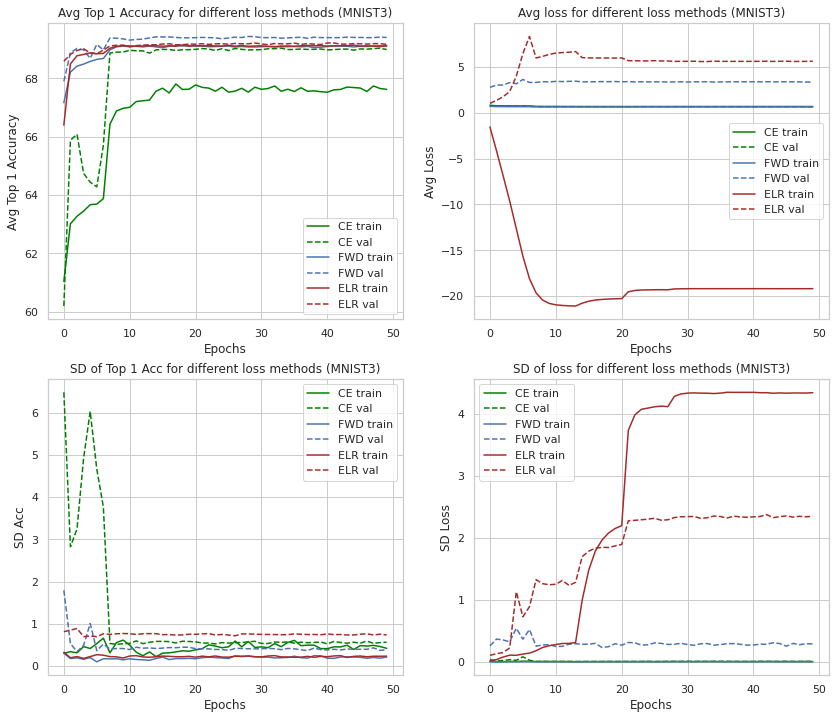

In [65]:
# Setup Parameters

# Possible values for MODEL_NAME are "lenet", "resnet50_gray_scale" and "resnet50"
MODEL_NAME = "lenet"

EPOCHS = 50
REPEAT = 10

exp_params = {}
exp_params["epochs"] = EPOCHS
exp_params["model_name"] = MODEL_NAME
exp_params["loss_type"] = LOSS_TYPES[0]
exp_params["t_matrix"] = t_matrix_mnist3
exp_params["dataset_name"] = "FASHION_MNIST3"

#cross entropy loss
exp_params["key"]  = "CE"
eval_metrics_mnist3 = execute_experiment(X_data_mnist3, y_data_mnist3, X_test_mnist3, y_test_mnist3, REPEAT, exp_params)

#forward loss
exp_params["key"]  = "FWD"
exp_params["loss_type"] = LOSS_TYPES[1]
eval_metrics = execute_experiment(X_data_mnist3, y_data_mnist3, X_test_mnist3, y_test_mnist3, REPEAT, exp_params)
eval_metrics_mnist3.update(eval_metrics)

#elr loss
exp_params["key"]  = "ELR"
exp_params["loss_type"] = LOSS_TYPES[2]
eval_metrics = execute_experiment(X_data_mnist3, y_data_mnist3, X_test_mnist3, y_test_mnist3, REPEAT, exp_params)
eval_metrics_mnist3.update(eval_metrics)

# Save result for future reference
save_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/mnist3.npy", eval_metrics_mnist3)

plot_result(eval_metrics_mnist3, "loss methods (MNIST3)")

#### 10.2 FASHION MNIST6 dataset

cross_entropy loss

Estimated transition matrix
:  tensor([[0.4191, 0.2824, 0.2985],
        [0.3088, 0.4095, 0.2818],
        [0.2690, 0.2911, 0.4399]])

Transition matrix error:  tensor(0.0515)

Test Loss: 0.9985 Test Accuracy: 82.83% 

forward loss

Test Loss: 0.2053 Test Accuracy: 94.80% 

elr loss

Test Loss: 0.7361 Test Accuracy: 87.67% 



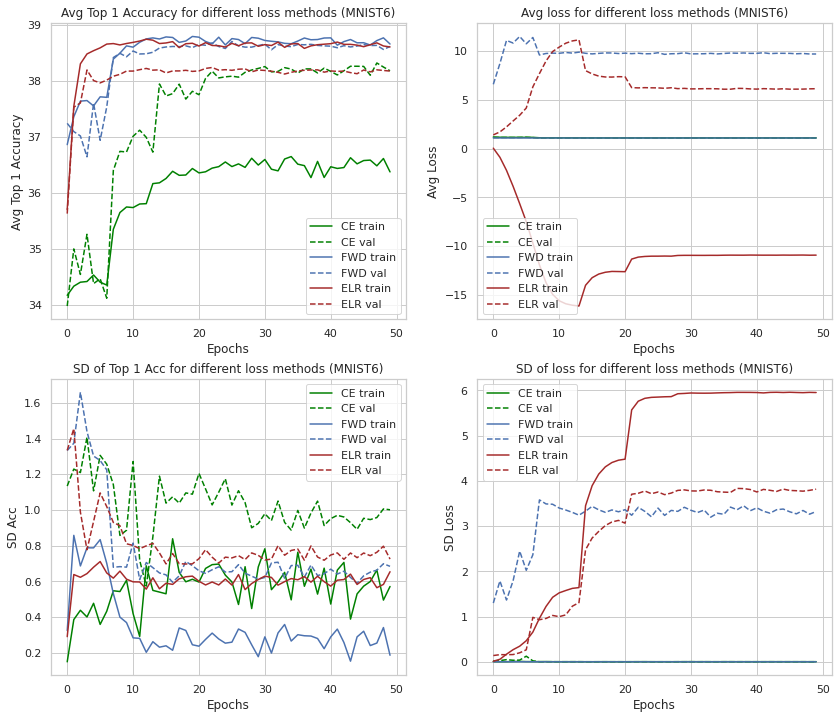

In [66]:
# Setup Parameters

# Possible values for MODEL_NAME are "lenet", "resnet50_gray_scale" and "resnet50"
MODEL_NAME = "lenet"

EPOCHS = 50
REPEAT = 10

exp_params = {}
exp_params["epochs"] = EPOCHS
exp_params["model_name"] = MODEL_NAME
exp_params["loss_type"] = LOSS_TYPES[0]
exp_params["t_matrix"] = t_matrix_mnist6
exp_params["dataset_name"] = "FASHION_MNIST6"

#cross entropy loss
exp_params["key"]  = "CE"
eval_metrics_mnist6 = execute_experiment(X_data_mnist6, y_data_mnist6, X_test_mnist6, y_test_mnist6, REPEAT, exp_params)

#forward loss
exp_params["key"]  = "FWD"
exp_params["loss_type"] = LOSS_TYPES[1]
eval_metrics = execute_experiment(X_data_mnist6, y_data_mnist6, X_test_mnist6, y_test_mnist6, REPEAT, exp_params)
eval_metrics_mnist6.update(eval_metrics)

#elr loss
exp_params["key"]  = "ELR"
exp_params["loss_type"] = LOSS_TYPES[2]
eval_metrics = execute_experiment(X_data_mnist6, y_data_mnist6, X_test_mnist6, y_test_mnist6, REPEAT, exp_params)
eval_metrics_mnist6.update(eval_metrics)

# Save result for future reference
save_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/mnist6.npy", eval_metrics_mnist6)

plot_result(eval_metrics_mnist6, "loss methods (MNIST6)")

#### 10.3 CIFAR dataset

In [66]:
# Setup Parameters
NUMBER_OF_WORKERS = 1

# Possible values for MODEL_NAME are "lenet", "resnet50_gray_scale", "resnet18" and "resnet50"
MODEL_NAME = "resnet18"

EPOCHS = 30
REPEAT = 10

exp_params = {}
exp_params["epochs"] = EPOCHS
exp_params["model_name"] = MODEL_NAME
exp_params["loss_type"] = LOSS_TYPES[0]
exp_params["t_matrix"] = None
exp_params["dataset_name"] = "CIFAR"

#cross entropy loss
exp_params["key"]  = "CE"
eval_metrics_cifar = execute_experiment(X_data_cifar, y_data_cifar, X_test_cifar, y_test_cifar, REPEAT, exp_params)


cross_entropy loss


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)



Estimated transition matrix
:  tensor([[0.8035, 0.1199, 0.0767],
        [0.0101, 0.9411, 0.0489],
        [0.0255, 0.0340, 0.9405]])

Test Loss: 1.0196 Test Accuracy: 48.70% 



In [67]:
save_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/cifar_ce.npy", eval_metrics_cifar)

In [68]:
#forward loss
NUMBER_OF_WORKERS = 1
exp_params["key"]  = "FWD"
exp_params["loss_type"] = LOSS_TYPES[1]
exp_params["t_matrix"] = eval_metrics_cifar["t_matrix"]
eval_metrics = execute_experiment(X_data_cifar, y_data_cifar, X_test_cifar, y_test_cifar, REPEAT, exp_params)
eval_metrics_cifar.update(eval_metrics)



forward loss

Test Loss: 1.1131 Test Accuracy: 37.03% 



In [69]:
save_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/cifar_fwd.npy", eval_metrics_cifar)

elr loss

Test Loss: 6.1247 Test Accuracy: 55.37% 



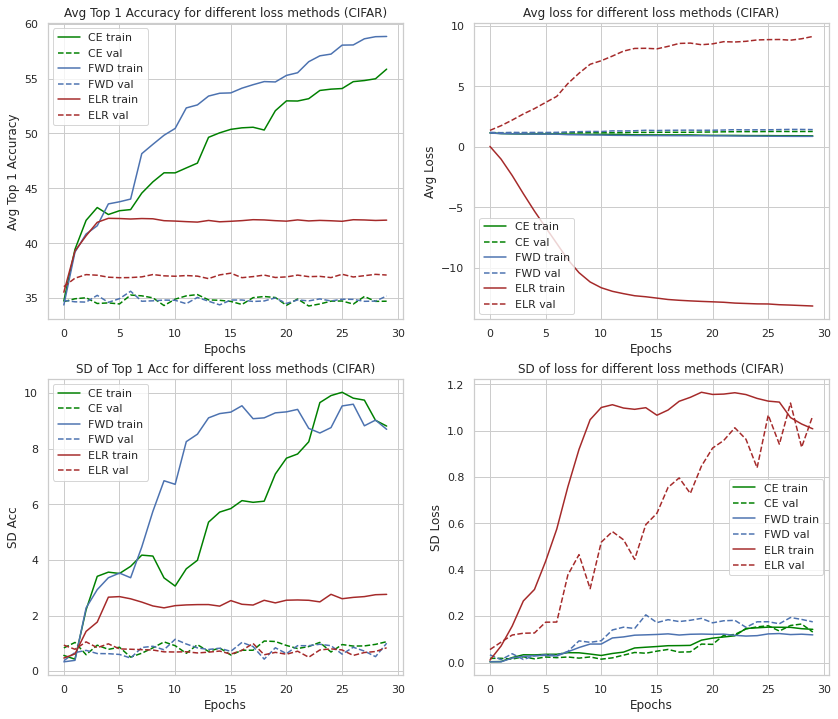

In [70]:
#elr loss
exp_params["key"]  = "ELR"
exp_params["loss_type"] = LOSS_TYPES[2]
eval_metrics = execute_experiment(X_data_cifar, y_data_cifar, X_test_cifar, y_test_cifar, REPEAT, exp_params)
eval_metrics_cifar.update(eval_metrics)

# Save result for future reference
save_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/cifar.npy", eval_metrics_cifar)

plot_result(eval_metrics_cifar, "loss methods (CIFAR)")

### 11. Additional data analysis
DO NOT excecute this section as the result file will not be available

In [71]:
eval_metric_dic_mnist3 = load_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/mnist3.npy")
        
eval_metric_dic_mnist3_CE_train_mean_acc = np.array(eval_metric_dic_mnist3["CE_train_mean_acc"])
eval_metric_dic_mnist3_CE_train_mean_loss = np.array(eval_metric_dic_mnist3["CE_train_mean_loss"])
eval_metric_dic_mnist3_CE_val_mean_acc = np.array(eval_metric_dic_mnist3["CE_val_mean_acc"])
eval_metric_dic_mnist3_CE_val_mean_loss = np.array(eval_metric_dic_mnist3["CE_val_mean_loss"])

eval_metric_dic_mnist3_FWD_train_mean_acc = np.array(eval_metric_dic_mnist3["FWD_train_mean_acc"])
eval_metric_dic_mnist3_FWD_train_mean_loss = np.array(eval_metric_dic_mnist3["FWD_train_mean_loss"])
eval_metric_dic_mnist3_FWD_val_mean_acc = np.array(eval_metric_dic_mnist3["FWD_val_mean_acc"])
eval_metric_dic_mnist3_FWD_val_mean_loss = np.array(eval_metric_dic_mnist3["FWD_val_mean_loss"])

eval_metric_dic_mnist3_ELR_train_mean_acc = np.array(eval_metric_dic_mnist3["ELR_train_mean_acc"])
eval_metric_dic_mnist3_ELR_train_mean_loss = np.array(eval_metric_dic_mnist3["ELR_train_mean_loss"])
eval_metric_dic_mnist3_ELR_val_mean_acc = np.array(eval_metric_dic_mnist3["ELR_val_mean_acc"])
eval_metric_dic_mnist3_ELR_val_mean_loss = np.array(eval_metric_dic_mnist3["ELR_val_mean_loss"])

eval_metric_dic_mnist3_CE_test_acc = np.array(eval_metric_dic_mnist3["CE_test_acc"])
eval_metric_dic_mnist3_CE_test_loss = np.array(eval_metric_dic_mnist3["CE_test_loss"])

eval_metric_dic_mnist3_FWD_test_acc = np.array(eval_metric_dic_mnist3["FWD_test_acc"])
eval_metric_dic_mnist3_FWD_test_loss = np.array(eval_metric_dic_mnist3["FWD_test_loss"])

eval_metric_dic_mnist3_ELR_test_acc = np.array(eval_metric_dic_mnist3["ELR_test_acc"])
eval_metric_dic_mnist3_ELR_test_loss = np.array(eval_metric_dic_mnist3["ELR_test_loss"])

In [78]:
print(np.max(eval_metric_dic_mnist3_CE_train_mean_acc))
print(np.min(eval_metric_dic_mnist3_CE_train_mean_loss))
print(np.max(eval_metric_dic_mnist3_CE_val_mean_acc))
print(np.min(eval_metric_dic_mnist3_CE_val_mean_loss))
print(np.max(eval_metric_dic_mnist3_CE_test_acc))
print(np.min(eval_metric_dic_mnist3_CE_test_loss))

67.81319444444443
0.6636921060416434
69.04166666666666
0.6437452850076888
98.63333333333334
0.4044677521387736


In [79]:
print(np.max(eval_metric_dic_mnist3_FWD_train_mean_acc))
print(np.min(eval_metric_dic_mnist3_FWD_train_mean_loss))
print(np.max(eval_metric_dic_mnist3_FWD_val_mean_acc))
print(np.min(eval_metric_dic_mnist3_FWD_val_mean_loss))
print(np.max(eval_metric_dic_mnist3_FWD_test_acc))
print(np.min(eval_metric_dic_mnist3_FWD_test_loss))

69.13541666666667
0.6284683733317588
69.44166666666668
2.7596120972103546
98.5
0.048741691505536436


In [80]:
print(np.max(eval_metric_dic_mnist3_ELR_train_mean_acc))
print(np.min(eval_metric_dic_mnist3_ELR_train_mean_loss))
print(np.max(eval_metric_dic_mnist3_ELR_val_mean_acc))
print(np.min(eval_metric_dic_mnist3_ELR_val_mean_loss))
print(np.max(eval_metric_dic_mnist3_ELR_test_acc))
print(np.min(eval_metric_dic_mnist3_ELR_test_loss))

69.14930555555556
-21.069506524615814
69.21944444444443
1.0064900649123723
97.86666666666666
0.2810157410842187


In [73]:
eval_metric_dic_mnist6 = load_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/mnist6.npy")
        
eval_metric_dic_mnist6_CE_train_mean_acc = np.array(eval_metric_dic_mnist6["CE_train_mean_acc"])
eval_metric_dic_mnist6_CE_train_mean_loss = np.array(eval_metric_dic_mnist6["CE_train_mean_loss"])
eval_metric_dic_mnist6_CE_val_mean_acc = np.array(eval_metric_dic_mnist6["CE_val_mean_acc"])
eval_metric_dic_mnist6_CE_val_mean_loss = np.array(eval_metric_dic_mnist6["CE_val_mean_loss"])

eval_metric_dic_mnist6_FWD_train_mean_acc = np.array(eval_metric_dic_mnist6["FWD_train_mean_acc"])
eval_metric_dic_mnist6_FWD_train_mean_loss = np.array(eval_metric_dic_mnist6["FWD_train_mean_loss"])
eval_metric_dic_mnist6_FWD_val_mean_acc = np.array(eval_metric_dic_mnist6["FWD_val_mean_acc"])
eval_metric_dic_mnist6_FWD_val_mean_loss = np.array(eval_metric_dic_mnist6["FWD_val_mean_loss"])

eval_metric_dic_mnist6_ELR_train_mean_acc = np.array(eval_metric_dic_mnist6["ELR_train_mean_acc"])
eval_metric_dic_mnist6_ELR_train_mean_loss = np.array(eval_metric_dic_mnist6["ELR_train_mean_loss"])
eval_metric_dic_mnist6_ELR_val_mean_acc = np.array(eval_metric_dic_mnist6["ELR_val_mean_acc"])
eval_metric_dic_mnist6_ELR_val_mean_loss = np.array(eval_metric_dic_mnist6["ELR_val_mean_loss"])

eval_metric_dic_mnist6_CE_test_acc = np.array(eval_metric_dic_mnist6["CE_test_acc"])
eval_metric_dic_mnist6_CE_test_loss = np.array(eval_metric_dic_mnist6["CE_test_loss"])

eval_metric_dic_mnist6_FWD_test_acc = np.array(eval_metric_dic_mnist6["FWD_test_acc"])
eval_metric_dic_mnist6_FWD_test_loss = np.array(eval_metric_dic_mnist6["FWD_test_loss"])

eval_metric_dic_mnist6_ELR_test_acc = np.array(eval_metric_dic_mnist6["ELR_test_acc"])
eval_metric_dic_mnist6_ELR_test_loss = np.array(eval_metric_dic_mnist6["ELR_test_loss"])

In [81]:
print(np.max(eval_metric_dic_mnist6_CE_train_mean_acc))
print(np.min(eval_metric_dic_mnist6_CE_train_mean_loss))
print(np.max(eval_metric_dic_mnist6_CE_val_mean_acc))
print(np.min(eval_metric_dic_mnist6_CE_val_mean_loss))
print(np.max(eval_metric_dic_mnist6_CE_test_acc))
print(np.min(eval_metric_dic_mnist6_CE_test_loss))

36.65138888888889
1.102471036699083
38.32222222222222
1.0944861223432754
82.83333329264323
0.9985233608881633


In [82]:
print(np.max(eval_metric_dic_mnist6_FWD_train_mean_acc))
print(np.min(eval_metric_dic_mnist6_FWD_train_mean_loss))
print(np.max(eval_metric_dic_mnist6_FWD_val_mean_acc))
print(np.min(eval_metric_dic_mnist6_FWD_val_mean_loss))
print(np.max(eval_metric_dic_mnist6_FWD_test_acc))
print(np.min(eval_metric_dic_mnist6_FWD_test_loss))

38.795833333333334
1.0920356665187412
38.705555555555556
6.604041866726346
94.79999997965494
0.2052597711707155


In [83]:
print(np.max(eval_metric_dic_mnist6_ELR_train_mean_acc))
print(np.min(eval_metric_dic_mnist6_ELR_train_mean_loss))
print(np.max(eval_metric_dic_mnist6_ELR_val_mean_acc))
print(np.min(eval_metric_dic_mnist6_ELR_val_mean_loss))
print(np.max(eval_metric_dic_mnist6_ELR_test_acc))
print(np.min(eval_metric_dic_mnist6_ELR_test_loss))

38.746527777777786
-16.14987426053153
38.24166666666667
1.409067998409271
87.66666666666667
0.7361398009459178


In [74]:
eval_metric_dic_cifar = load_result("/content/drive/MyDrive/COMP5328-AdvancedML/result/cifar.npy")
        
eval_metric_dic_cifar_CE_train_mean_acc = np.array(eval_metric_dic_cifar["CE_train_mean_acc"])
eval_metric_dic_cifar_CE_train_mean_loss = np.array(eval_metric_dic_cifar["CE_train_mean_loss"])
eval_metric_dic_cifar_CE_val_mean_acc = np.array(eval_metric_dic_cifar["CE_val_mean_acc"])
eval_metric_dic_cifar_CE_val_mean_loss = np.array(eval_metric_dic_cifar["CE_val_mean_loss"])

eval_metric_dic_cifar_FWD_train_mean_acc = np.array(eval_metric_dic_cifar["FWD_train_mean_acc"])
eval_metric_dic_cifar_FWD_train_mean_loss = np.array(eval_metric_dic_cifar["FWD_train_mean_loss"])
eval_metric_dic_cifar_FWD_val_mean_acc = np.array(eval_metric_dic_cifar["FWD_val_mean_acc"])
eval_metric_dic_cifar_FWD_val_mean_loss = np.array(eval_metric_dic_cifar["FWD_val_mean_loss"])

eval_metric_dic_cifar_ELR_train_mean_acc = np.array(eval_metric_dic_cifar["ELR_train_mean_acc"])
eval_metric_dic_cifar_ELR_train_mean_loss = np.array(eval_metric_dic_cifar["ELR_train_mean_loss"])
eval_metric_dic_cifar_ELR_val_mean_acc = np.array(eval_metric_dic_cifar["ELR_val_mean_acc"])
eval_metric_dic_cifar_ELR_val_mean_loss = np.array(eval_metric_dic_cifar["ELR_val_mean_loss"])

eval_metric_dic_cifar_CE_test_acc = np.array(eval_metric_dic_cifar["CE_test_acc"])
eval_metric_dic_cifar_CE_test_loss = np.array(eval_metric_dic_cifar["CE_test_loss"])

eval_metric_dic_cifar_FWD_test_acc = np.array(eval_metric_dic_cifar["FWD_test_acc"])
eval_metric_dic_cifar_FWD_test_loss = np.array(eval_metric_dic_cifar["FWD_test_loss"])

eval_metric_dic_cifar_ELR_test_acc = np.array(eval_metric_dic_cifar["ELR_test_acc"])
eval_metric_dic_cifar_ELR_test_loss = np.array(eval_metric_dic_cifar["ELR_test_loss"])

In [84]:
print(np.max(eval_metric_dic_cifar_CE_train_mean_acc))
print(np.min(eval_metric_dic_cifar_CE_train_mean_loss))
print(np.max(eval_metric_dic_cifar_CE_val_mean_acc))
print(np.min(eval_metric_dic_cifar_CE_val_mean_loss))
print(np.max(eval_metric_dic_cifar_CE_test_acc))
print(np.min(eval_metric_dic_cifar_CE_test_loss))

55.8575
0.9146582464377083
35.33333332316081
1.1544109402656555
48.699999989827475
1.0196359093983969


In [85]:
print(np.max(eval_metric_dic_cifar_FWD_train_mean_acc))
print(np.min(eval_metric_dic_cifar_FWD_train_mean_loss))
print(np.max(eval_metric_dic_cifar_FWD_val_mean_acc))
print(np.min(eval_metric_dic_cifar_FWD_val_mean_loss))
print(np.max(eval_metric_dic_cifar_FWD_test_acc))
print(np.min(eval_metric_dic_cifar_FWD_test_loss))

58.833333333333336
0.8724011241674423
35.63666665802002
1.177161650911967
37.03333333333333
1.1131287819544475


In [86]:
print(np.max(eval_metric_dic_cifar_ELR_train_mean_acc))
print(np.min(eval_metric_dic_cifar_ELR_train_mean_loss))
print(np.max(eval_metric_dic_cifar_ELR_val_mean_acc))
print(np.min(eval_metric_dic_cifar_ELR_val_mean_loss))
print(np.max(eval_metric_dic_cifar_ELR_test_acc))
print(np.min(eval_metric_dic_cifar_ELR_test_loss))

42.27666666666667
-13.162535389264425
37.28333332366944
1.3670810656547547
55.36666665649414
6.124669368743897


### 12. References

#https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674
#https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu
#https://www.geeksforgeeks.org/how-to-print-exception-stack-trace-in-python/
#https://stackoverflow.com/questions/43829711/what-is-the-correct-way-to-change-image-channel-ordering-between-channels-first
#https://numpy.org/doc/stable/reference/generated/numpy.unique.html
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://wellsr.com/python/seaborn-barplot-tutorial-for-python/
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary
#https://stackoverflow.com/questions/41856787/plot-colour-image-from-a-numpy-array-that-has-3-channels
#https://stackoverflow.com/questions/7526625/matplotlib-global-legend-and-title-aside-subplots
#https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
#https://www.section.io/engineering-education/image-preprocessing-in-python/
#https://freecontent.manning.com/the-computer-vision-pipeline-part-3-image-preprocessing/
#https://www.codecademy.com/articles/normalization
#https://github.com/xiaoboxia/T-Revision/blob/master/tools.py
#https://pytorch.org/docs/stable/tensors.html
#https://github.com/giorgiop/loss-correction
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
#https://discuss.pytorch.org/t/index-concept-in-torch-utils-data-dataloader/72449/4
#https://github.com/xiaoboxia/T-Revision
#https://github.com/xiaoboxia/T-Revision/blob/master/Lenet.py
#https://github.com/shengliu66/ELR/blob/c93fe057c1a3d898355a25763eb470eb31bab9ef/ELR/model/loss.py
#https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
#https://github.com/giorgiop/loss-correction
#https://www.titanwolf.org/Network/q/9dea2bd4-3220-4f43-a348-8a97657cf45b/y
#https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file/32216025
